<a href="https://colab.research.google.com/github/AnosWill-Lucifer/Air_Pollution_Analysis_PRAC1/blob/main/PRAC_1_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Impot Required Library

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import ( r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error)
import joblib

## Task 01: Data Importing

#### Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/Programming_Data_Analysis'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Programming_Data_Analysis


I have selected the following five monitoring stations for this project: Gucheng, Dongsi, Guanyuan, Shunyi, and Huairou. These sites were chosen to provide a diverse set of data from various regions of Beijing, including urban, suburban, and potentially rural areas.

This geographical diversity allows for a comprehensive analysis of air quality patterns across different environments. Additionally, these stations offer well-rounded datasets with minimal missing values, which is crucial for accurate data preprocessing and modeling.

#### Read 5 files and merge

In [4]:
files = ['PRSA_Data_Gucheng_20130301-20170228.csv',
         'PRSA_Data_Dongsi_20130301-20170228.csv',
         'PRSA_Data_Guanyuan_20130301-20170228.csv',
         'PRSA_Data_Shunyi_20130301-20170228.csv',
         'PRSA_Data_Huairou_20130301-20170228.csv']
# Loading the datasets
data = {name: pd.read_csv(name) for name in files}
# Mergeing the datasets by 'year', 'month', 'day', 'hour' (assuming common columns to merge on)
merged_data = pd.concat(data.values(), axis=0, ignore_index=True)
merged_data.columns = merged_data.columns.str.upper()
merged_data.to_csv('merged_data.csv', index=False)
merged_data.head()

NO  YEAR  MONTH  DAY  HOUR  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   WD  WSPM  STATION  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng

In [5]:
merged_data.tail()

NO  YEAR  MONTH  DAY  HOUR  PM2.5  PM10  SO2   NO2      CO    O3  \
175315  35060  2017      2   28    19   16.0  28.0  2.0  19.0   300.0  95.0   
175316  35061  2017      2   28    20   21.0  34.0  4.0  24.0   500.0  80.0   
175317  35062  2017      2   28    21   17.0  33.0  2.0  39.0   900.0  60.0   
175318  35063  2017      2   28    22   11.0  29.0  3.0  32.0  1400.0  69.0   
175319  35064  2017      2   28    23   11.0  20.0  2.0  27.0   400.0  77.0   

        TEMP    PRES  DEWP  RAIN   WD  WSPM  STATION  
175315   9.9  1008.6 -14.1   0.0  WNW   1.8  Huairou  
175316   9.5  1008.9 -14.4   0.0  SSW   1.3  Huairou  
175317   8.4  1009.3 -14.6   0.0   SE   1.5  Huairou  
175318   8.3  1009.5 -14.7   0.0  ENE   3.2  Huairou  
175319   6.7  1009.3 -13.6   0.0   NE   1.9  Huairou

#### Read the merged file

In [6]:
df = pd.read_csv('merged_data.csv')

## Task 02: (EDA)  Data Understanding

In [7]:
df.shape

(175320, 18)

In [8]:
df.columns

Index(['NO', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WD', 'WSPM', 'STATION'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175320 entries, 0 to 175319
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   NO       175320 non-null  int64  
 1   YEAR     175320 non-null  int64  
 2   MONTH    175320 non-null  int64  
 3   DAY      175320 non-null  int64  
 4   HOUR     175320 non-null  int64  
 5   PM2.5    171442 non-null  float64
 6   PM10     172632 non-null  float64
 7   SO2      171400 non-null  float64
 8   NO2      169388 non-null  float64
 9   CO       165369 non-null  float64
 10  O3       170114 non-null  float64
 11  TEMP     175127 non-null  float64
 12  PRES     175126 non-null  float64
 13  DEWP     175122 non-null  float64
 14  RAIN     175131 non-null  float64
 15  WD       174217 non-null  object 
 16  WSPM     175157 non-null  float64
 17  STATION  175320 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 24.1+ MB


In [10]:
df.isnull().sum()

NO            0
YEAR          0
MONTH         0
DAY           0
HOUR          0
PM2.5      3878
PM10       2688
SO2        3920
NO2        5932
CO         9951
O3         5206
TEMP        193
PRES        194
DEWP        198
RAIN        189
WD         1103
WSPM        163
STATION       0
dtype: int64

In [11]:
df.describe().T

count          mean           std        min      25%      50%  \
NO     175320.0  17532.500000  10122.133783     1.0000  8766.75  17532.5   
YEAR   175320.0   2014.662560      1.177200  2013.0000  2014.00   2015.0   
MONTH  175320.0      6.522930      3.448713     1.0000     4.00      7.0   
DAY    175320.0     15.729637      8.800117     1.0000     8.00     16.0   
HOUR   175320.0     11.500000      6.922206     0.0000     5.75     11.5   
PM2.5  171442.0     80.437255     80.931035     2.0000    21.00     56.0   
PM10   172632.0    105.722100     92.460389     2.0000    36.00     84.0   
SO2    171400.0     15.451688     21.460623     0.2856     2.00      7.0   
NO2    169388.0     48.862360     34.167762     1.0265    22.00     42.0   
CO     165369.0   1225.991068   1134.777647   100.0000   500.00    900.0   
O3     170114.0     57.150906     56.442517     0.2142    11.00     45.0   
TEMP   175127.0     13.390887     11.488618   -19.9000     3.00     14.4   
PRES   175126.0   1010.777415     10.422248   982.8000  1002.40   1010.4   
DEWP   175122.0      2.577018     13.815964   -43.4000    -8.90      3.2   
RAIN   175131.0      0.064986      0.830760     0.0000     0.00      0.0   
WSPM   175157.0      1.674463      1.238881     0.0000     0.90      1.4   

            75%      max  
NO     26298.25  35064.0  
YEAR    2016.00   2017.0  
MONTH     10.00     12.0  
DAY       23.00     31.0  
HOUR      17.25     23.0  
PM2.5    112.00    941.0  
PM10     148.00    999.0  
SO2       19.00    500.0  
NO2       69.00    276.0  
CO      1500.00  10000.0  
O3        81.00   1071.0  
TEMP      23.20     41.6  
PRES    1019.00   1042.8  
DEWP      15.30     29.1  
RAIN       0.00     72.5  
WSPM       2.10     12.9

In [12]:
df.describe(include=['object'])

WD  STATION
count   174217   175320
unique      16        5
top         NE  Gucheng
freq     17402    35064

## Task 02: (EDA)  Data Preprocessing

#### Missing Values Analysis

The purpose of this following code block is to measure the quality of the dataset quantitatively using missing values. It does this by calculating, for every column, how many entries there should be, how many of those entries are missing, and the corresponding percentage of missing values. This is useful because missing data can lead to biased analysis or error at later steps of modeling. Positioning the metrics in the shape of a gradient-colored sorted table enables one to readily choose columns with a majority missing values to require cleaning or imputation prior to further analysis.

<Figure size 1000x600 with 0 Axes>

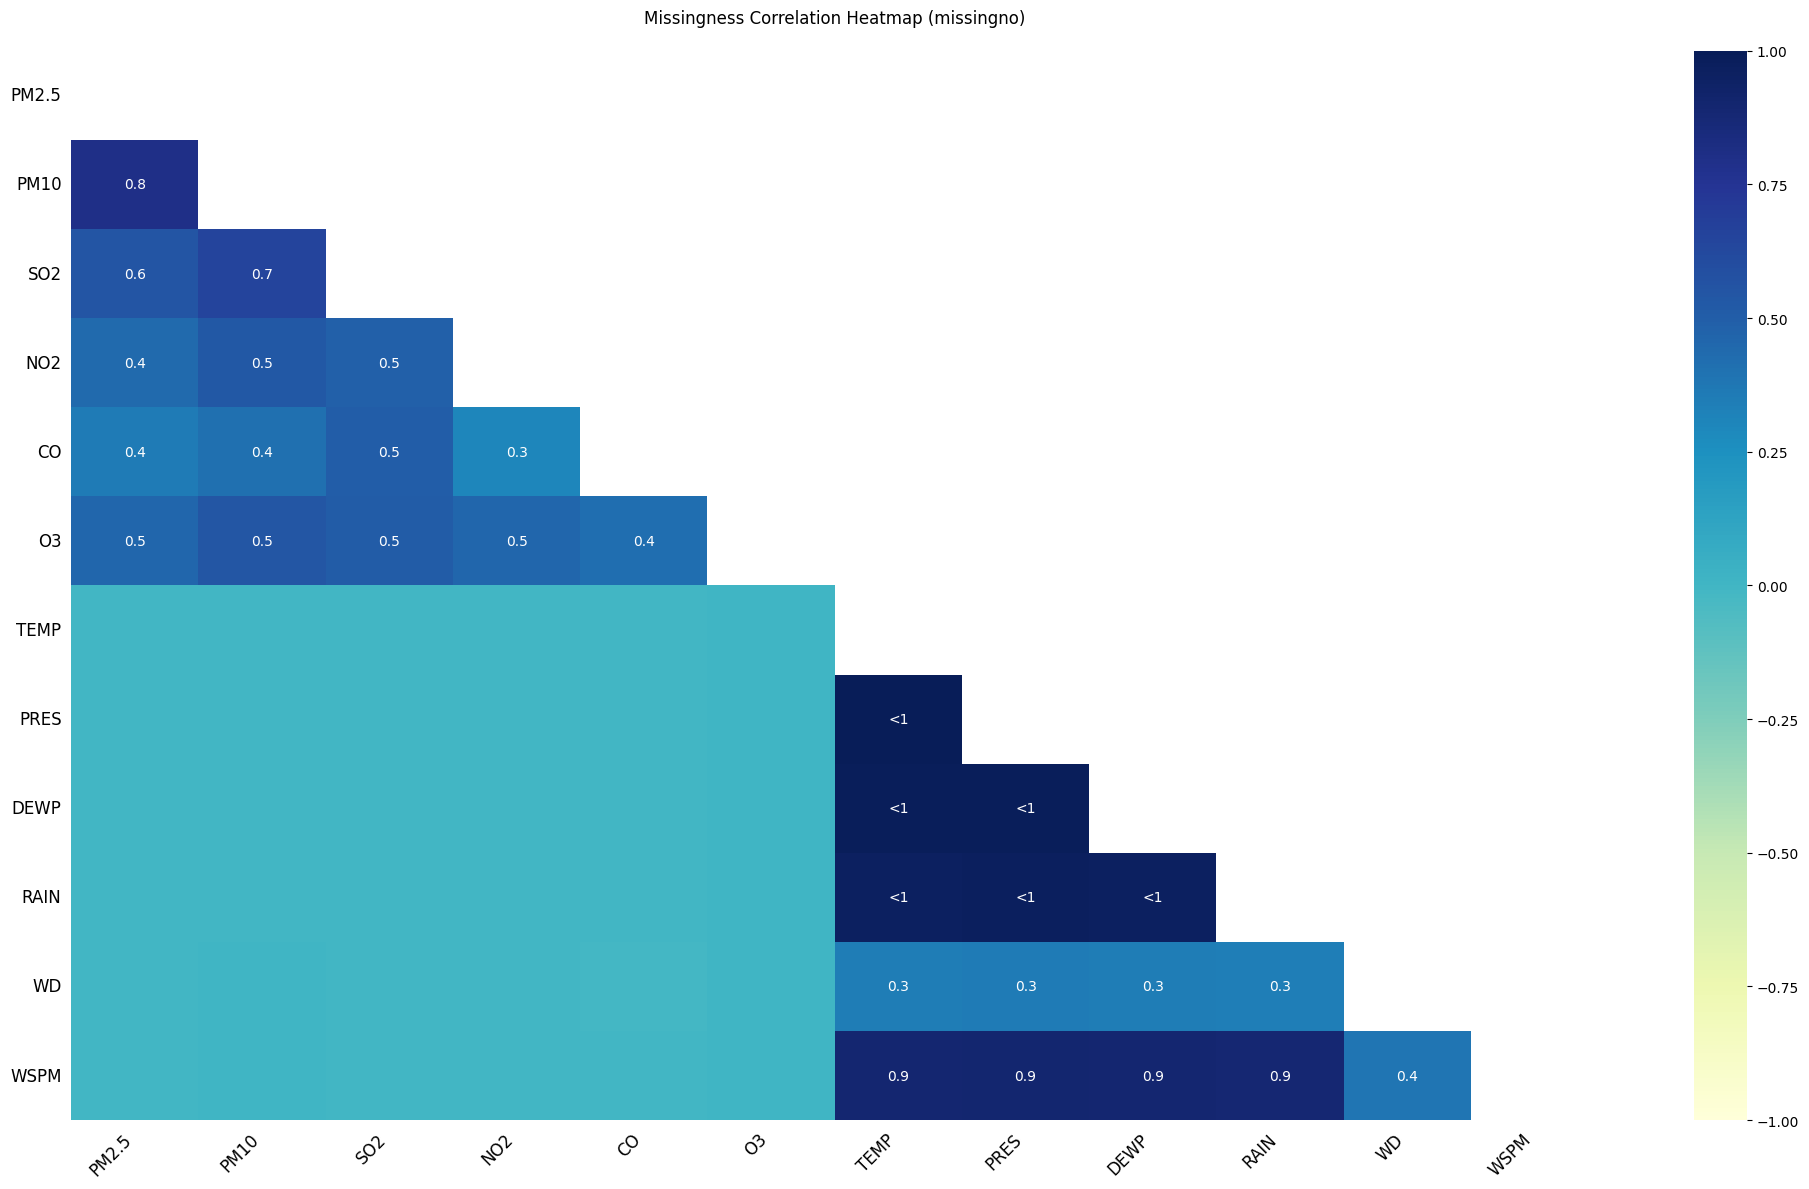

In [13]:
def missing_values_table(df):
    # Total number of values (rows) for each column
    total_values = pd.Series(df.shape[0], index=df.columns)
    # Number of missing values per column
    mis_val = df.isnull().sum()
    # Percentage of missing values per column
    mis_val_percent = 100 * mis_val / df.shape[0]
    # Combine into a single DataFrame
    mis_val_table = pd.concat([total_values, mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table = mis_val_table.rename(columns={0: 'Total Values',
                                                  1: 'Missing Values',
                                                  2: '% of Total Values'})
    # Sort the table by percentage of missing values in descending order
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)
    return mis_val_table

missing_values = missing_values_table(merged_data)
display(missing_values.style.background_gradient(cmap='Oranges'))

plt.figure(figsize=(10, 6))
msno.heatmap(merged_data, cmap='YlGnBu', fontsize=12)
plt.title("Missingness Correlation Heatmap (missingno)", pad=20)
plt.tight_layout()
plt.show()

Nullity Correlation Heatmap (missingno)

The following heatmap, generated by `missingno.heatmap()`, is a visualization of the pairwise missingness correlation between our variables.
Denser colors indicate that two columns are often missing together.


Points of key insight from the plot:

*   PM2.5 & PM10 display very high co-missingness (~0.8), which means sensor failure tends to delete both measurements at once.
*   SO₂, NO₂, CO, and O₃ show moderate correlations (0.4–0.7) between themselves, again suggesting clustered pollutant dropouts.
*   Meteorological parameters (TEMP, PRES, DEWP, RAIN) exhibit almost all in the cyan range (near zero correlation), i.e., they do not frequently miss data or do so unrelated to pollutant sensors.

Observing these trends, we are confident that any imputation strategy should treat pollutant readings as a whole (e.g., multivariate strategy), while weather variables may be treated separately.











#### Missing Value Removed by Forward Imputation

In [14]:
# 1. Captured missing‑value summary before imputation
missing_before = missing_values_table(merged_data)
# 2. Performed forward linear interpolation to fill NaNs
imputed_data = merged_data.interpolate(method='linear',limit_direction='forward',axis=0)
# 3. Captured missing‑value summary after imputation
missing_after = missing_values_table(imputed_data)
# 4. Saved the imputed dataset
imputed_data.to_csv('merged_data_imputed.csv', index=False)
print("Imputed dataset saved to 'merged_data_imputed.csv'")
# 5. Built a comparative summary
comparison = pd.concat([
    missing_before.rename(columns={
        'Missing Values': 'Missing_Before',
        '% of Total Values': '%_Before'
    }),
    missing_after.rename(columns={
        'Missing Values': 'Missing_After',
        '% of Total Values': '%_After'
    })[['Missing_After','%_After']]
], axis=1)

print("\nMissing‑Value Comparison Before vs. After Imputation:")
display(comparison)

# 6. Compared descriptive stats
print("\nDescriptive statistics BEFORE imputation:")
display(merged_data.describe().T)
print("\nDescriptive statistics AFTER imputation:")
display(imputed_data.describe().T)

<ipython-input-14-c3074a0e1712>:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  imputed_data = merged_data.interpolate(method='linear',limit_direction='forward',axis=0)


Imputed dataset saved to 'merged_data_imputed.csv'

Missing‑Value Comparison Before vs. After Imputation:


Total Values  Missing_Before  %_Before  Missing_After   %_After
CO             175320            9951  5.675907              0  0.000000
NO2            175320            5932  3.383527             20  0.011408
O3             175320            5206  2.969427              0  0.000000
SO2            175320            3920  2.235911              0  0.000000
PM2.5          175320            3878  2.211955              0  0.000000
PM10           175320            2688  1.533196              0  0.000000
WD             175320            1103  0.629135           1103  0.629135
DEWP           175320             198  0.112936              0  0.000000
PRES           175320             194  0.110655              0  0.000000
TEMP           175320             193  0.110084              0  0.000000
RAIN           175320             189  0.107803              0  0.000000
WSPM           175320             163  0.092973              0  0.000000
YEAR           175320               0  0.000000              0  0.000000
NO             175320               0  0.000000              0  0.000000
DAY            175320               0  0.000000              0  0.000000
MONTH          175320               0  0.000000              0  0.000000
HOUR           175320               0  0.000000              0  0.000000
STATION        175320               0  0.000000              0  0.000000


Descriptive statistics BEFORE imputation:


count          mean           std        min      25%      50%  \
NO     175320.0  17532.500000  10122.133783     1.0000  8766.75  17532.5   
YEAR   175320.0   2014.662560      1.177200  2013.0000  2014.00   2015.0   
MONTH  175320.0      6.522930      3.448713     1.0000     4.00      7.0   
DAY    175320.0     15.729637      8.800117     1.0000     8.00     16.0   
HOUR   175320.0     11.500000      6.922206     0.0000     5.75     11.5   
PM2.5  171442.0     80.437255     80.931035     2.0000    21.00     56.0   
PM10   172632.0    105.722100     92.460389     2.0000    36.00     84.0   
SO2    171400.0     15.451688     21.460623     0.2856     2.00      7.0   
NO2    169388.0     48.862360     34.167762     1.0265    22.00     42.0   
CO     165369.0   1225.991068   1134.777647   100.0000   500.00    900.0   
O3     170114.0     57.150906     56.442517     0.2142    11.00     45.0   
TEMP   175127.0     13.390887     11.488618   -19.9000     3.00     14.4   
PRES   175126.0   1010.777415     10.422248   982.8000  1002.40   1010.4   
DEWP   175122.0      2.577018     13.815964   -43.4000    -8.90      3.2   
RAIN   175131.0      0.064986      0.830760     0.0000     0.00      0.0   
WSPM   175157.0      1.674463      1.238881     0.0000     0.90      1.4   

            75%      max  
NO     26298.25  35064.0  
YEAR    2016.00   2017.0  
MONTH     10.00     12.0  
DAY       23.00     31.0  
HOUR      17.25     23.0  
PM2.5    112.00    941.0  
PM10     148.00    999.0  
SO2       19.00    500.0  
NO2       69.00    276.0  
CO      1500.00  10000.0  
O3        81.00   1071.0  
TEMP      23.20     41.6  
PRES    1019.00   1042.8  
DEWP      15.30     29.1  
RAIN       0.00     72.5  
WSPM       2.10     12.9


Descriptive statistics AFTER imputation:


count          mean           std        min      25%      50%  \
NO     175320.0  17532.500000  10122.133783     1.0000  8766.75  17532.5   
YEAR   175320.0   2014.662560      1.177200  2013.0000  2014.00   2015.0   
MONTH  175320.0      6.522930      3.448713     1.0000     4.00      7.0   
DAY    175320.0     15.729637      8.800117     1.0000     8.00     16.0   
HOUR   175320.0     11.500000      6.922206     0.0000     5.75     11.5   
PM2.5  175320.0     80.411255     80.938280     2.0000    21.00     56.0   
PM10   175320.0    106.135228     93.294820     2.0000    36.00     84.0   
SO2    175320.0     15.542785     21.946135     0.2856     2.00      7.0   
NO2    175300.0     48.822331     34.216735     1.0265    22.00     42.0   
CO     175320.0   1229.183336   1129.626627   100.0000   500.00    900.0   
O3     175320.0     57.121697     56.647927     0.2142    11.00     44.0   
TEMP   175320.0     13.382315     11.490648   -19.9000     3.00     14.4   
PRES   175320.0   1010.784693     10.422890   982.8000  1002.40   1010.4   
DEWP   175320.0      2.567071     13.820709   -43.4000    -8.90      3.1   
RAIN   175320.0      0.064940      0.830343     0.0000     0.00      0.0   
WSPM   175320.0      1.674723      1.239037     0.0000     0.90      1.4   

            75%      max  
NO     26298.25  35064.0  
YEAR    2016.00   2017.0  
MONTH     10.00     12.0  
DAY       23.00     31.0  
HOUR      17.25     23.0  
PM2.5    112.00    941.0  
PM10     148.00    999.0  
SO2       19.00    500.0  
NO2       69.00    276.0  
CO      1500.00  10000.0  
O3        81.00   1071.0  
TEMP      23.10     41.6  
PRES    1019.00   1042.8  
DEWP      15.30     29.1  
RAIN       0.00     72.5  
WSPM       2.10     12.9

#### Removing left over NAN and Duplicate values

In [15]:
# 1. Droping any rows still containing NaNs after interpolation and also the duplicate values
final_data = imputed_data.dropna()
final_data = final_data.drop_duplicates()

# 2. Calculated row counts before and after dropping
rows_before = imputed_data.shape[0]
rows_after  = final_data.shape[0]
removed     = rows_before - rows_after
pct_removed = removed / rows_before * 100

print(f"Rows before drop: {rows_before}")
print(f"Rows after drop:  {rows_after}")
print(f"Rows removed:     {removed} ({pct_removed:.2f}%)\n")

# 3. Verified that no missing values remain
missing_final = missing_values_table(final_data)
display(missing_final.style.background_gradient(cmap='Oranges'))

# 4. Saved the cleaned, final dataset
final_data.to_csv('merged_data_final.csv', index=False)
print("Final cleaned dataset saved to 'merged_data_final.csv'\n")

# 5. Quick descriptive‑stats comparison
print("Descriptive statistics — original vs. final:")
print("\nOriginal merged_data:")
display(merged_data.describe())

print("\nFinal_data (after drop):")
display(final_data.describe())


Rows before drop: 175320
Rows after drop:  174197
Rows removed:     1123 (0.64%)



Final cleaned dataset saved to 'merged_data_final.csv'

Descriptive statistics — original vs. final:

Original merged_data:


NO          YEAR          MONTH            DAY  \
count  175320.000000  175320.00000  175320.000000  175320.000000   
mean    17532.500000    2014.66256       6.522930      15.729637   
std     10122.133783       1.17720       3.448713       8.800117   
min         1.000000    2013.00000       1.000000       1.000000   
25%      8766.750000    2014.00000       4.000000       8.000000   
50%     17532.500000    2015.00000       7.000000      16.000000   
75%     26298.250000    2016.00000      10.000000      23.000000   
max     35064.000000    2017.00000      12.000000      31.000000   

                HOUR          PM2.5           PM10            SO2  \
count  175320.000000  171442.000000  172632.000000  171400.000000   
mean       11.500000      80.437255     105.722100      15.451688   
std         6.922206      80.931035      92.460389      21.460623   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      21.000000      36.000000       2.000000   
50%        11.500000      56.000000      84.000000       7.000000   
75%        17.250000     112.000000     148.000000      19.000000   
max        23.000000     941.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  169388.000000  165369.000000  170114.000000  175127.000000   
mean       48.862360    1225.991068      57.150906      13.390887   
std        34.167762    1134.777647      56.442517      11.488618   
min         1.026500     100.000000       0.214200     -19.900000   
25%        22.000000     500.000000      11.000000       3.000000   
50%        42.000000     900.000000      45.000000      14.400000   
75%        69.000000    1500.000000      81.000000      23.200000   
max       276.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  175126.000000  175122.000000  175131.000000  175157.000000  
mean     1010.777415       2.577018       0.064986       1.674463  
std        10.422248      13.815964       0.830760       1.238881  
min       982.800000     -43.400000       0.000000       0.000000  
25%      1002.400000      -8.900000       0.000000       0.900000  
50%      1010.400000       3.200000       0.000000       1.400000  
75%      1019.000000      15.300000       0.000000       2.100000  
max      1042.800000      29.100000      72.500000      12.900000


Final_data (after drop):


NO           YEAR          MONTH            DAY  \
count  174197.000000  174197.000000  174197.000000  174197.000000   
mean    17474.360982    2014.655838       6.524326      15.722837   
std     10110.093907       1.175731       3.444333       8.800820   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8718.000000    2014.000000       4.000000       8.000000   
50%     17456.000000    2015.000000       7.000000      16.000000   
75%     26229.000000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                HOUR         PM2.5           PM10            SO2  \
count  174197.000000  174197.00000  174197.000000  174197.000000   
mean       11.501501      80.26853     106.019648      15.557892   
std         6.914355      80.84729      93.208304      21.972885   
min         0.000000       2.00000       2.000000       0.285600   
25%         6.000000      21.00000      36.000000       2.000000   
50%        12.000000      56.00000      84.000000       7.000000   
75%        17.000000     112.00000     148.000000      19.000000   
max        23.000000     941.00000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  174197.000000  174197.000000  174197.000000  174197.000000   
mean       48.743547    1226.401038      57.323413      13.423007   
std        34.180304    1126.730903      56.712555      11.489233   
min         1.026500     100.000000       0.214200     -19.900000   
25%        22.000000     500.000000      11.500650       3.000000   
50%        41.125000     900.000000      44.500000      14.400000   
75%        69.000000    1500.000000      81.610200      23.200000   
max       276.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  174197.000000  174197.000000  174197.000000  174197.000000  
mean     1010.757668       2.578597       0.065215       1.682499  
std        10.424060      13.826707       0.832892       1.236806  
min       982.800000     -36.000000       0.000000       0.000000  
25%      1002.300000      -8.900000       0.000000       0.900000  
50%      1010.400000       3.200000       0.000000       1.400000  
75%      1019.000000      15.300000       0.000000       2.100000  
max      1042.800000      29.100000      72.500000      12.900000

Final Cleaning and Verification

After interpolation, there were still some rows that contained NaNs (typically at the very start or end of each station's time series), so we dropped those rows to have a fully complete dataset.

• Rows before drop: 175,320

• Rows after drop:  174,197

• Rows removed:     1,123 (0.64%)

We re-ran our missing-value summary to ensure **no NaNs remain** in any column.
Means, minima, and maxima changed only very slightly in our "before vs. after" descriptive statistics comparison—showing that a very small proportion of unusable records was removed without biasing the data.

We saved the cleaned dataset ("merged_data_final.csv"), now gap‑free and ready for feature engineering and modeling.


#### Feature Engineering

##### Combines year, date, time into DATETIME

In [16]:
# 1. Made an explicit copy to avoid SettingWithCopyWarning
final_data = final_data.copy()
# 2. Created a proper datetime column from year, month, day, and hour
final_data.loc[:, 'DATETIME'] = pd.to_datetime( final_data[['YEAR', 'MONTH', 'DAY', 'HOUR']].assign(minute=0), format=None )
# 3. Set the new datetime column as the index and drop the original columns
final_data.set_index('DATETIME', inplace=True)
final_data.drop(columns=['YEAR', 'MONTH', 'DAY', 'HOUR'], inplace=True)
# 4. Verified the result
print("Index dtype:", final_data.index.dtype)

Index dtype: datetime64[ns]


In [17]:
final_data.head()

NO  PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  \
DATETIME                                                                       
2013-03-01 20:00:00  21   13.0  25.0  12.0   5.0  1100.0  61.0   1.6  1027.1   
2013-03-01 21:00:00  22   15.0  23.0  14.0  13.0  1200.0  52.0   1.0  1028.1   
2013-03-01 22:00:00  23   16.0  28.0  16.0  19.0  1200.0  45.0   1.3  1028.4   
2013-03-01 23:00:00  24   16.0  28.0  14.0  20.0  1100.0  44.0   0.2  1028.6   
2013-03-02 00:00:00  25   14.0  18.0  24.0  43.0  1399.0  25.0  -0.3  1028.9   

                     DEWP  RAIN   WD  WSPM  STATION  
DATETIME                                             
2013-03-01 20:00:00 -18.4   0.0  ESE   1.9  Gucheng  
2013-03-01 21:00:00 -17.4   0.0  SSE   0.7  Gucheng  
2013-03-01 22:00:00 -17.6   0.0    E   1.0  Gucheng  
2013-03-01 23:00:00 -17.6   0.0  ESE   1.1  Gucheng  
2013-03-02 00:00:00 -18.0   0.0  ENE   1.4  Gucheng

#####  **Air Quality Index (AQI) Calculation and Categorization**

> To transform raw hourly pollutant concentrations into a single, standardized AQI value and into a category. The U.S. EPA’s official methodology is used. Here’s how it works in detail:  
>  
> 1. **Breakpoint Tables (Clow, Chigh → Ilow, Ihigh)**  
>    - For each pollutant (PM₂.₅, PM₁₀, O₃, CO, SO₂, NO₂), the EPA defines several concentration intervals, e.g. for PM₂.₅:  
>      - 0.0–12.0 µg/m³ maps linearly to an AQI of 0–50  
>      - 12.1–35.4 µg/m³ maps to AQI 51–100 and so on up to 500 on the AQI scale.  
>    - In the code, each tuple `(Clow, Chigh, Ilow, Ihigh)` represents one of these brackets.  
>  
> 2. Sub‑Index Calculation  
>    - Given a measured concentration C, The bracket is located where `Clow ≤ C ≤ Chigh`.  
>    - The pollutant’s sub‑index I is calculated by linear interpolation:  
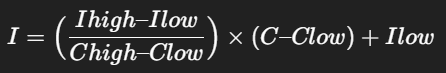

>    - This scales C gives proportionally within the AQI band defined by Ilow–Ihigh.  
>  
> 3. **Overall AQI Determination**  
>    - A sub‑index for each pollutant present in the row is calculated and the **maximum** of these values is taken.  
>    - Per EPA rules, the worst‑performing pollutant dictates the overall AQI (i.e., the “governing” index).  
>  
> 4. **AQI Category Assignment**  
>    - Once each row has a numeric AQI (0–500), it is bucketed it into one of six categories—Good, Moderate, Unhealthy for Sensitive Groups, Unhealthy, Very Unhealthy, Hazardous—using `pd.cut()` and the standard cut‑points (0–50, 51–100, etc.).  
>    - This produces an **AQI_Category** column that immediately tells whether the air quality at that hour was “Good,” “Moderate,” and so on.  
>  
> By structuring the code around these breakpoints and interpolation steps, it is ensured that AQI values and categories **exactly match** the EPA’s definitions.

In [18]:
# 1. Defined EPA‐style breakpoints for each pollutant
breakpoints = {
    'PM2.5': [
        (0.0,   12.0,   0,   50),
        (12.1,  35.4,  51,  100),
        (35.5,  55.4, 101,  150),
        (55.5, 150.4, 151,  200),
        (150.5,250.4, 201,  300),
        (250.5,350.4, 301,  400),
        (350.5,500.4, 401,  500),
    ],
    'PM10': [
        (0,    54,    0,   50),
        (55,  154,   51,  100),
        (155, 254,  101,  150),
        (255, 354,  151,  200),
        (355, 424,  201,  300),
        (425, 504,  301,  400),
        (505, 604,  401,  500),
    ],
    'O3': [
        (0.000, 0.054, 0,   50),
        (0.055, 0.070,51,  100),
        (0.071, 0.085,101, 150),
        (0.086, 0.105,151, 200),
        (0.106, 0.200,201, 300),
    ],
    'CO': [
        (0.0,   4.4,   0,   50),
        (4.5,   9.4,  51,  100),
        (9.5,  12.4, 101,  150),
        (12.5, 15.4, 151,  200),
        (15.5,30.4, 201,  300),
    ],
    'SO2': [
        (0,    35,    0,   50),
        (36,  75,    51,  100),
        (76,  185,  101,  150),
        (186, 304,  151,  200),
        (305, 604,  201,  300),
    ],
    'NO2': [
        (0,    53,    0,   50),
        (54,  100,   51,  100),
        (101, 360,  101,  150),
        (361, 649,  151,  200),
        (650,1249,  201,  300),
    ],
}
# 2. Function to compute individual pollutant AQI segment
def _aqi_segment(conc, bp_list):
    for Clow, Chigh, Ilow, Ihigh in bp_list:
        if Clow <= conc <= Chigh:
            return ((Ihigh - Ilow) / (Chigh - Clow)) * (conc - Clow) + Ilow
    return None
# 3. Function to compute overall AQI (max of sub‐indices)
def compute_aqi(row):
    sub_indices = []
    for pollutant, bps in breakpoints.items():
        conc = row[pollutant]
        sub = _aqi_segment(conc, bps)
        if sub is not None:
            sub_indices.append(sub)
    return max(sub_indices) if sub_indices else None
# 4. Applied to the DataFrame
final_data['AQI'] = final_data.apply(compute_aqi, axis=1)
# 5. Round AQI to integer and inspect
final_data['AQI'] = final_data['AQI'].round().astype(int)
# 6. Defined AQI categories based on EPA breakpoints
category_bins = [0, 50, 100, 150, 200, 300, 500]
category_labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous']
# 7. Created the AQI_Category column
final_data['AQI_Category'] = pd.cut(final_data['AQI'],bins=category_bins,labels=category_labels,right=True,include_lowest=True)
# 8. Brought 'datetime' back as a column so it’s saved in the CSV
output_df = final_data.reset_index()
# 9. Overwritten the original merged CSV with the updated DataFrame
output_df.to_csv('merged_data_final.csv', index=False)
print("Updated CSV saved: 'merged_data_final.csv' now contains the datetime index, AQI, and AQI_Category columns.")



Updated CSV saved: 'merged_data_final.csv' now contains the datetime index, AQI, and AQI_Category columns.


In [19]:
final_data.head(100)

NO  PM2.5   PM10    SO2     NO2      CO    O3  TEMP  \
DATETIME                                                                    
2013-03-01 20:00:00   21   13.0   25.0   12.0    5.00  1100.0  61.0   1.6   
2013-03-01 21:00:00   22   15.0   23.0   14.0   13.00  1200.0  52.0   1.0   
2013-03-01 22:00:00   23   16.0   28.0   16.0   19.00  1200.0  45.0   1.3   
2013-03-01 23:00:00   24   16.0   28.0   14.0   20.00  1100.0  44.0   0.2   
2013-03-02 00:00:00   25   14.0   18.0   24.0   43.00  1399.0  25.0  -0.3   
...                  ...    ...    ...    ...     ...     ...   ...   ...   
2013-03-05 19:00:00  116  186.0  226.0   89.0  108.75   100.0  52.0   7.6   
2013-03-05 20:00:00  117  203.0  250.0   98.0  111.50   100.0  44.0   6.2   
2013-03-05 21:00:00  118  217.0  264.0  113.0  114.25   100.0  15.0   5.1   
2013-03-05 22:00:00  119  224.0  271.0  112.0  117.00   100.0  15.0   4.3   
2013-03-05 23:00:00  120  228.0  289.0  108.0  119.75   100.0  15.0   3.6   

                       PRES  DEWP  RAIN   WD  WSPM  STATION  AQI  \
DATETIME                                                           
2013-03-01 20:00:00  1027.1 -18.4   0.0  ESE   1.9  Gucheng   53   
2013-03-01 21:00:00  1028.1 -17.4   0.0  SSE   0.7  Gucheng   57   
2013-03-01 22:00:00  1028.4 -17.6   0.0    E   1.0  Gucheng   59   
2013-03-01 23:00:00  1028.6 -17.6   0.0  ESE   1.1  Gucheng   59   
2013-03-02 00:00:00  1028.9 -18.0   0.0  ENE   1.4  Gucheng   55   
...                     ...   ...   ...  ...   ...      ...  ...   
2013-03-05 19:00:00  1006.5  -6.2   0.0   SE   0.0  Gucheng  236   
2013-03-05 20:00:00  1006.9  -6.1   0.0    W   0.7  Gucheng  253   
2013-03-05 21:00:00  1007.0  -5.6   0.0  WNW   0.8  Gucheng  267   
2013-03-05 22:00:00  1006.8  -5.2   0.0  WNW   0.1  Gucheng  274   
2013-03-05 23:00:00  1006.5  -5.1   0.0    N   0.2  Gucheng  278   

                       AQI_Category  
DATETIME                             
2013-03-01 20:00:00        Moderate  
2013-03-01 21:00:00        Moderate  
2013-03-01 22:00:00        Moderate  
2013-03-01 23:00:00        Moderate  
2013-03-02 00:00:00        Moderate  
...                             ...  
2013-03-05 19:00:00  Very Unhealthy  
2013-03-05 20:00:00  Very Unhealthy  
2013-03-05 21:00:00  Very Unhealthy  
2013-03-05 22:00:00  Very Unhealthy  
2013-03-05 23:00:00  Very Unhealthy  

[100 rows x 16 columns]

##### Industrial, Vehicular Pollution and Seasons

In [20]:
# 1. Loaded the enriched dataset
df = pd.read_csv('merged_data_final.csv', parse_dates=['DATETIME'], index_col='DATETIME')
# 2. Grouped pollutants into two categories
vehicular   = ['PM2.5', 'PM10', 'NO2', 'CO']
industrial  = ['SO2', 'O3']
df['Vehicular_Pollution']  = df[vehicular].mean(axis=1)
df['Industrial_Pollution'] = df[industrial].mean(axis=1)
# 3. Added a 'season' column
season_map = {
    12:'Winter', 1:'Winter', 2:'Winter',
    3:'Spring', 4:'Spring', 5:'Spring',
    6:'Summer', 7:'Summer', 8:'Summer',
    9:'Autumn',10:'Autumn',11:'Autumn'
}
df['SEASONS'] = df.index.month.map(season_map)
df.to_csv('merged_data_final.csv')
df1 = pd.read_csv('merged_data_final.csv', parse_dates=['DATETIME'], index_col='DATETIME')
df1.head()

NO  PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  \
DATETIME                                                                       
2013-03-01 20:00:00  21   13.0  25.0  12.0   5.0  1100.0  61.0   1.6  1027.1   
2013-03-01 21:00:00  22   15.0  23.0  14.0  13.0  1200.0  52.0   1.0  1028.1   
2013-03-01 22:00:00  23   16.0  28.0  16.0  19.0  1200.0  45.0   1.3  1028.4   
2013-03-01 23:00:00  24   16.0  28.0  14.0  20.0  1100.0  44.0   0.2  1028.6   
2013-03-02 00:00:00  25   14.0  18.0  24.0  43.0  1399.0  25.0  -0.3  1028.9   

                     DEWP  RAIN   WD  WSPM  STATION  AQI AQI_Category  \
DATETIME                                                                
2013-03-01 20:00:00 -18.4   0.0  ESE   1.9  Gucheng   53     Moderate   
2013-03-01 21:00:00 -17.4   0.0  SSE   0.7  Gucheng   57     Moderate   
2013-03-01 22:00:00 -17.6   0.0    E   1.0  Gucheng   59     Moderate   
2013-03-01 23:00:00 -17.6   0.0  ESE   1.1  Gucheng   59     Moderate   
2013-03-02 00:00:00 -18.0   0.0  ENE   1.4  Gucheng   55     Moderate   

                     Vehicular_Pollution  Industrial_Pollution SEASONS  
DATETIME                                                                
2013-03-01 20:00:00               285.75                  36.5  Spring  
2013-03-01 21:00:00               312.75                  33.0  Spring  
2013-03-01 22:00:00               315.75                  30.5  Spring  
2013-03-01 23:00:00               291.00                  29.0  Spring  
2013-03-02 00:00:00               368.50                  24.5  Spring

#### Outliers and their removal

PM2.5: 7911 outliers (4.54%)
PM10: 5620 outliers (3.23%)
SO2: 15400 outliers (8.84%)
NO2: 3009 outliers (1.73%)
CO: 11445 outliers (6.57%)
O3: 7308 outliers (4.20%)
TEMP: 0 outliers (0.00%)
PRES: 0 outliers (0.00%)
DEWP: 0 outliers (0.00%)
RAIN: 6874 outliers (3.95%)
WSPM: 10414 outliers (5.98%)
AQI: 4474 outliers (2.57%)
Vehicular_Pollution: 10430 outliers (5.99%)
Industrial_Pollution: 8778 outliers (5.04%)


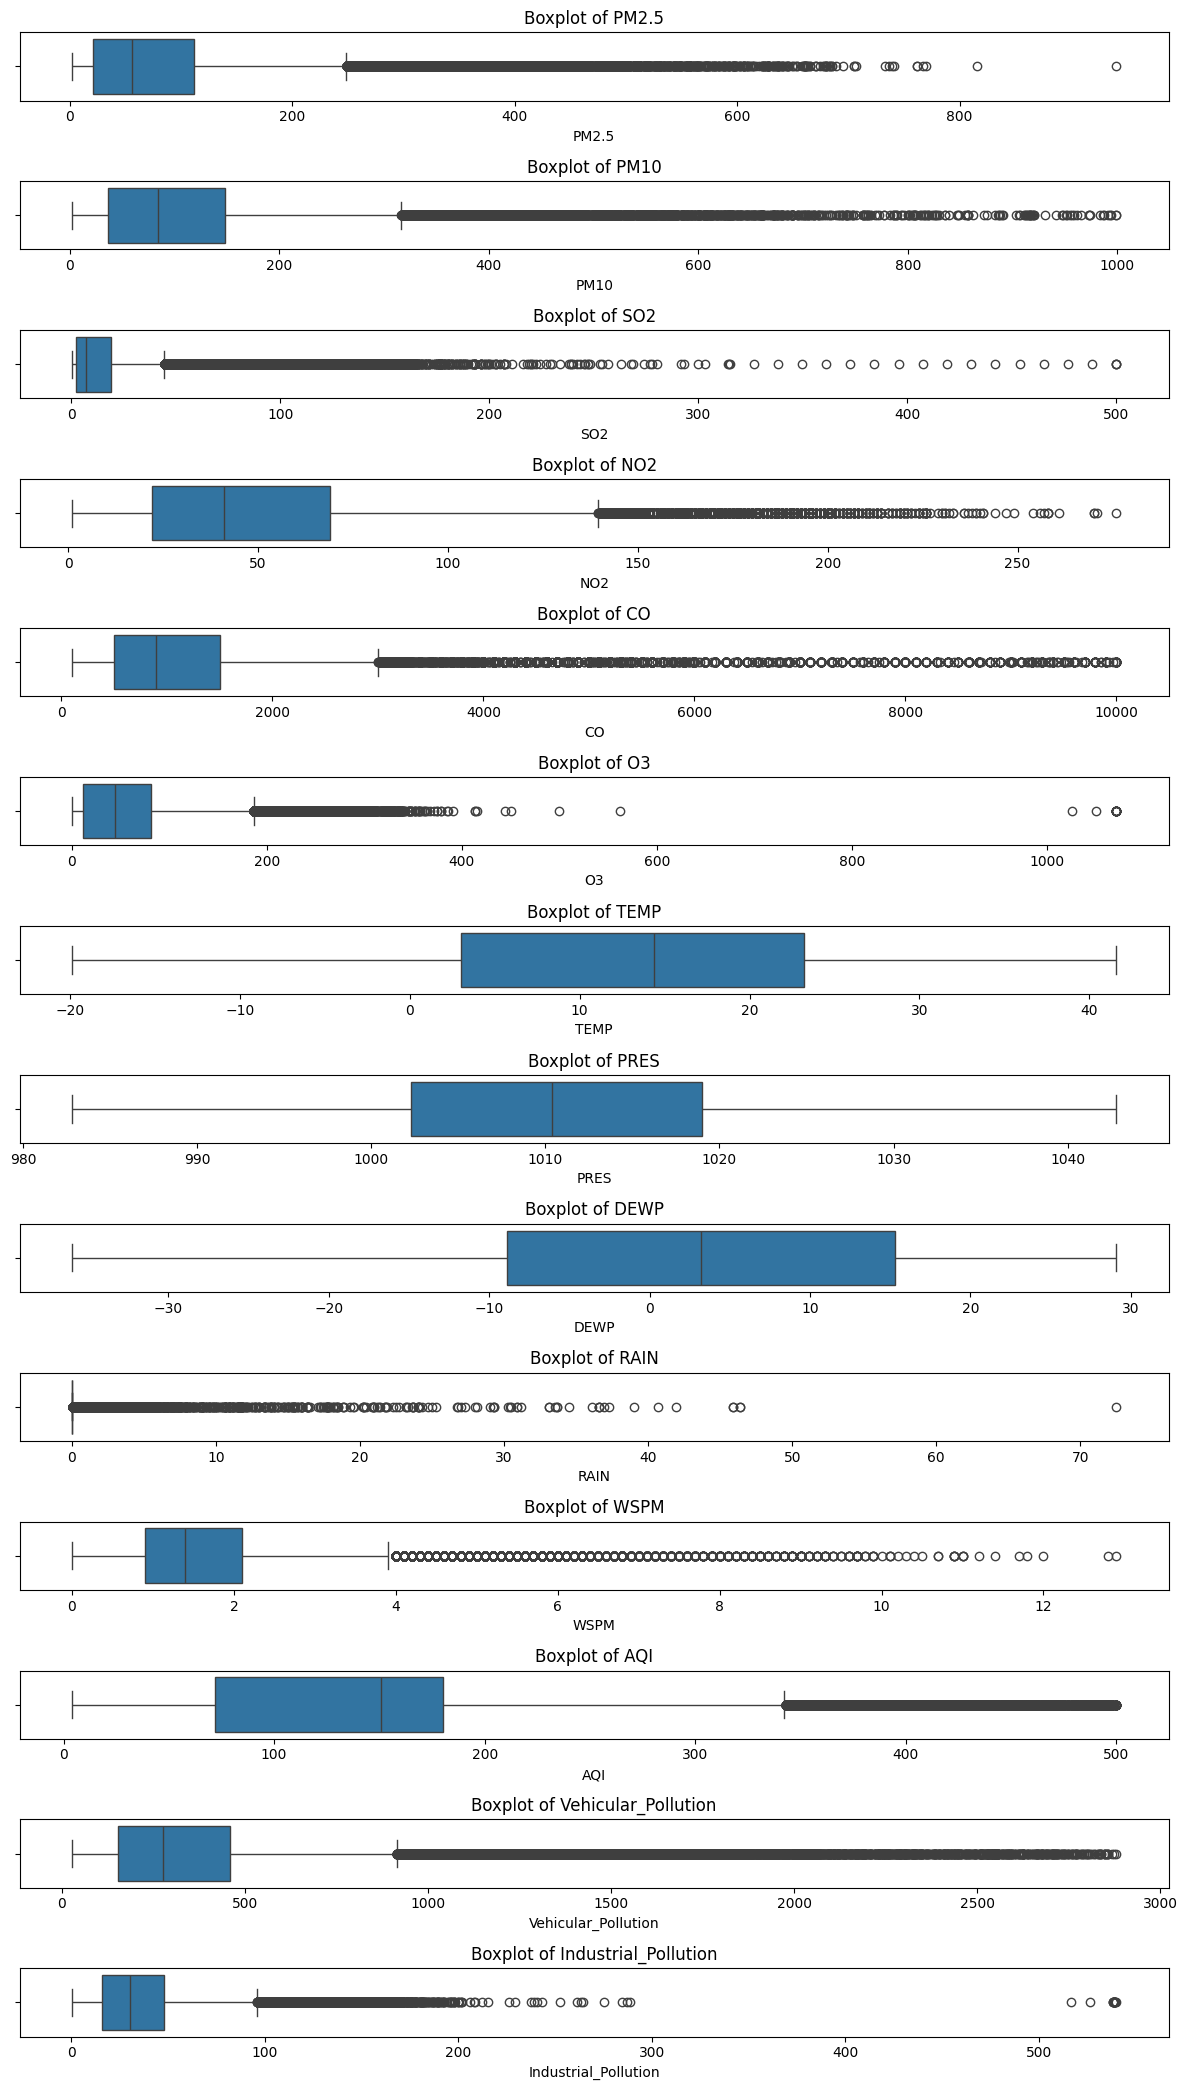


Rows before outlier removal: 174197
Rows after outlier removal:  125399
Total rows removed:          48798


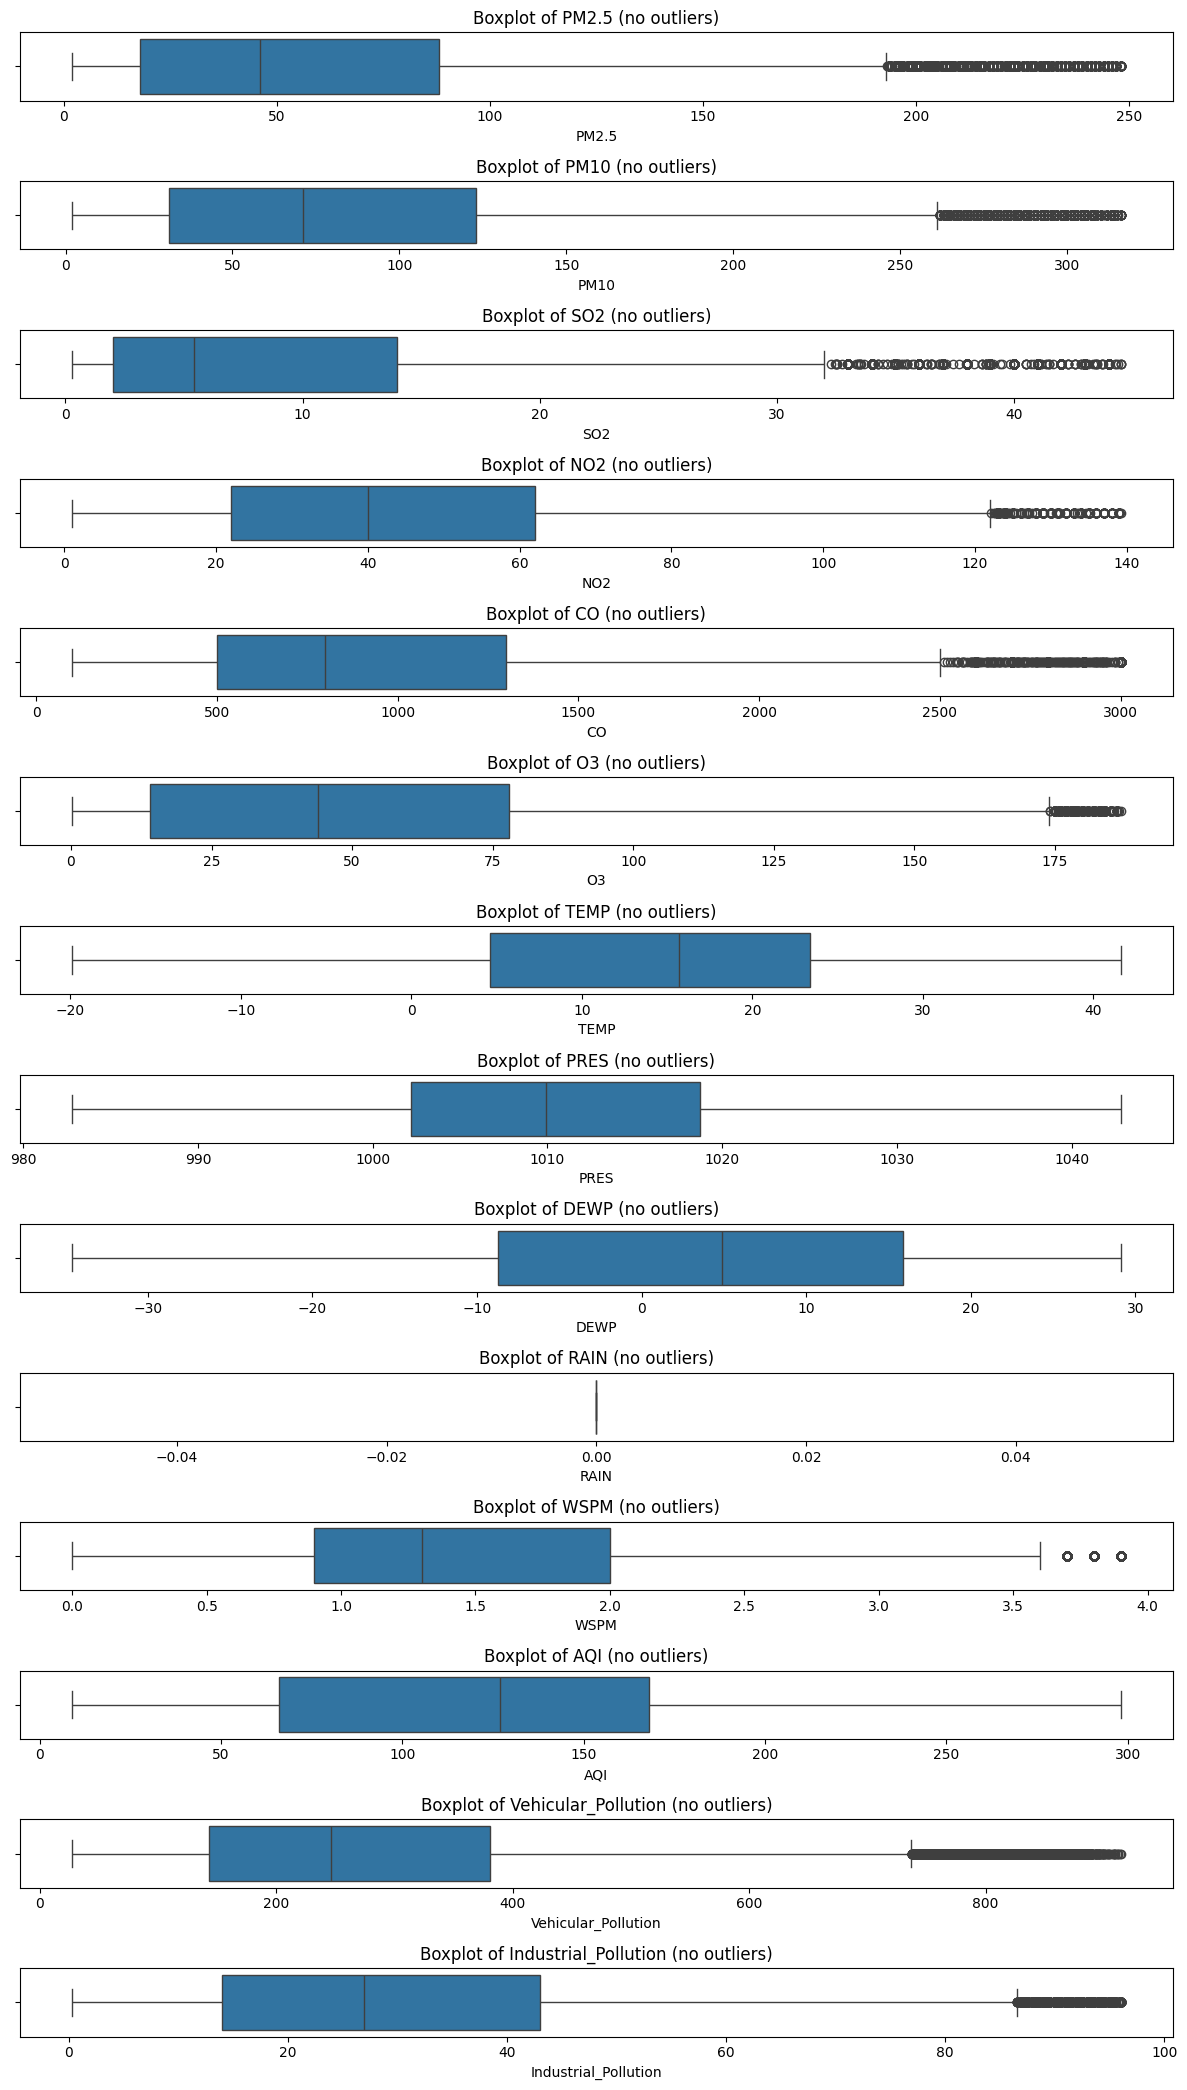

In [21]:
# 1. Loaded the enriched dataset
df = pd.read_csv('merged_data_final.csv', parse_dates=['DATETIME'], index_col='DATETIME')
# 2. Identifed numeric features (excluding code columns)
numeric_cols = df.select_dtypes(include='number').columns.drop(['NO'])
# 3. Outlier detection using the IQR method
outlier_info = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_count = mask.sum()
    outlier_info[col] = {
        'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
        'lower_bound': lower, 'upper_bound': upper,
        'outliers': outlier_count
    }
    print(f"{col}: {outlier_count} outliers ({outlier_count/len(df)*100:.2f}%)")
# 4. Plot boxplots for each numeric feature (showing outliers)
plt.figure(figsize=(12, len(numeric_cols)*1.5))
for i, col in enumerate(numeric_cols, 1):
    ax = plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()
# 5. Remove outliers: keep only rows within bounds for all features
df_clean = df.copy()
for col, info in outlier_info.items():
    df_clean = df_clean[
        (df_clean[col] >= info['lower_bound']) &
        (df_clean[col] <= info['upper_bound'])
    ]
print(f"\nRows before outlier removal: {len(df)}")
print(f"Rows after outlier removal:  {len(df_clean)}")
print(f"Total rows removed:          {len(df) - len(df_clean)}")
# 6. Saved the cleaned, outlier-free dataset
df_clean.to_csv('merged_data_no_outliers.csv')
# 7. Quick boxplots after removal to verify
plt.figure(figsize=(12, len(numeric_cols)*1.5))
for i, col in enumerate(numeric_cols, 1):
    ax = plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df_clean[col], ax=ax)
    ax.set_title(f"Boxplot of {col} (no outliers)")
plt.tight_layout()
plt.show()

#### Removing any sign of NaN after Feature Engineering

In [22]:
df=pd.read_csv('merged_data_no_outliers.csv', parse_dates=['DATETIME'], index_col='DATETIME')
nan_count = df.isnull().sum().sum()  # Total NaN values in the DataFrame
print(f"Total NaN values after feature engineering: {nan_count}")
# Remove rows with NaN values
df_final = df.dropna()
# Saved the final cleaned dataset (overwriting the previous file)
df_final.to_csv('merged_data_no_outliers.csv')
print("Final cleaned dataset (with NaN values removed) saved to 'merged_data_no_outliers.csv'")

Total NaN values after feature engineering: 0
Final cleaned dataset (with NaN values removed) saved to 'merged_data_no_outliers.csv'


## Task 02: (EDA) Statistics/computation-based analysis and Visualisation:

#### Statistical Summary

In [23]:
# 1. Loaded the cleaned dataset
df = pd.read_csv('merged_data_no_outliers.csv', parse_dates=['DATETIME'], index_col='DATETIME')
display(df.head())
# 2. Columns to summarize
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
                'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'AQI']
# 3. Standard describe() table
stats = df[numeric_cols].describe().T
# 4. Added more moments: median, skewness, and kurtosis
stats['median']   = df[numeric_cols].median()
stats['skew']     = df[numeric_cols].skew()
stats['kurtosis'] = df[numeric_cols].kurtosis()
print("=== Detailed Descriptive Statistics ===")
display(stats)
# 5. Showed how many hours fall into each AQI category
print("\n=== AQI Category Distribution ===")
display(df['AQI_Category'].value_counts().sort_index().to_frame(name='Count'))
# 6. Computed time-based summaries (numeric only)
yearly   = df.resample('YE').mean(numeric_only=True)   # year-end
monthly  = df.resample('ME').mean(numeric_only=True)   # month-end
weekly   = df.resample('W').mean(numeric_only=True)
daily    = df.resample('D').mean(numeric_only=True)
seasonal = df.groupby('SEASONS').mean(numeric_only=True)
# 7. Computed correlation matrices
corr_pollutants   = df[['PM2.5','PM10','SO2','NO2','CO','O3','AQI']].corr()
corr_vehicle_ind  = df[['Vehicular_Pollution','Industrial_Pollution']].corr()
# 8. Saved enriched DataFrame and summaries
df.to_csv('merged_data_eda.csv')
yearly.to_csv('yearly_summary.csv')
monthly.to_csv('monthly_summary.csv')
weekly.to_csv('weekly_summary.csv')
daily.to_csv('daily_summary.csv')
seasonal.to_csv('seasonal_summary.csv')

NO  PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  \
DATETIME                                                                       
2013-03-01 20:00:00  21   13.0  25.0  12.0   5.0  1100.0  61.0   1.6  1027.1   
2013-03-01 21:00:00  22   15.0  23.0  14.0  13.0  1200.0  52.0   1.0  1028.1   
2013-03-01 22:00:00  23   16.0  28.0  16.0  19.0  1200.0  45.0   1.3  1028.4   
2013-03-01 23:00:00  24   16.0  28.0  14.0  20.0  1100.0  44.0   0.2  1028.6   
2013-03-02 00:00:00  25   14.0  18.0  24.0  43.0  1399.0  25.0  -0.3  1028.9   

                     DEWP  RAIN   WD  WSPM  STATION  AQI AQI_Category  \
DATETIME                                                                
2013-03-01 20:00:00 -18.4   0.0  ESE   1.9  Gucheng   53     Moderate   
2013-03-01 21:00:00 -17.4   0.0  SSE   0.7  Gucheng   57     Moderate   
2013-03-01 22:00:00 -17.6   0.0    E   1.0  Gucheng   59     Moderate   
2013-03-01 23:00:00 -17.6   0.0  ESE   1.1  Gucheng   59     Moderate   
2013-03-02 00:00:00 -18.0   0.0  ENE   1.4  Gucheng   55     Moderate   

                     Vehicular_Pollution  Industrial_Pollution SEASONS  
DATETIME                                                                
2013-03-01 20:00:00               285.75                  36.5  Spring  
2013-03-01 21:00:00               312.75                  33.0  Spring  
2013-03-01 22:00:00               315.75                  30.5  Spring  
2013-03-01 23:00:00               291.00                  29.0  Spring  
2013-03-02 00:00:00               368.50                  24.5  Spring

=== Detailed Descriptive Statistics ===


count         mean         std       min     25%        50%     75%  \
PM2.5  125399.0    60.674141   52.199001    2.0000    18.0    46.0000    88.0   
PM10   125399.0    83.477330   62.377592    2.0000    31.0    71.0000   123.0   
SO2    125399.0     9.810285   10.032333    0.2856     2.0     5.4264    14.0   
NO2    125399.0    44.008635   27.277356    1.0265    22.0    40.0000    62.0   
CO     125399.0   943.084670  605.619033  100.0000   500.0   800.0000  1300.0   
O3     125399.0    51.908225   43.720844    0.2142    14.0    44.0000    78.0   
TEMP   125399.0    14.086015   11.151281  -19.9000     4.6    15.7000    23.4   
PRES   125399.0  1010.526609   10.421438  982.8000  1002.2  1009.9000  1018.7   
DEWP   125399.0     3.289935   13.962231  -34.6000    -8.7     4.9000    15.9   
RAIN   125399.0     0.000000    0.000000    0.0000     0.0     0.0000     0.0   
WSPM   125399.0     1.485806    0.874704    0.0000     0.9     1.3000     2.0   
AQI    125399.0   121.811139   61.886443    9.0000    66.0   127.0000   168.0   

             max     median      skew  kurtosis  
PM2.5   248.0000    46.0000  1.177827  0.891395  
PM10    316.0000    71.0000  0.861158  0.175375  
SO2      44.5000     5.4264  1.486549  1.430303  
NO2     139.1934    40.0000  0.680937 -0.062916  
CO     3000.0000   800.0000  1.085425  0.853397  
O3      186.7200    44.0000  0.859489  0.088981  
TEMP     41.6000    15.7000 -0.268186 -1.014992  
PRES   1042.8000  1009.9000  0.170196 -0.788009  
DEWP     29.1000     4.9000 -0.281055 -1.138431  
RAIN      0.0000     0.0000  0.000000  0.000000  
WSPM      3.9000     1.3000  0.689756 -0.002231  
AQI     298.0000   127.0000  0.159359 -0.775231


=== AQI Category Distribution ===


Count
AQI_Category                         
Good                            18766
Moderate                        33581
Unhealthy                       44649
Unhealthy for Sensitive Groups  18950
Very Unhealthy                   9453

#### Graphical Visiualizations

=== Yearly Averages ===


NO      PM2.5       PM10        SO2        NO2  \
DATETIME                                                               
2013-12-31   3774.881234  62.564033  84.058091  11.608127  45.889001   
2014-12-31  12001.395951  62.037135  89.196928  10.839333  47.320094   
2015-12-31  20498.599981  60.641560  82.312140   8.553497  40.813667   
2016-12-31  29286.975581  59.195451  81.217117   8.089098  42.358965   
2017-12-31  34422.295830  51.862737  66.809974  13.751557  45.097947   

                    CO         O3       TEMP         PRES       DEWP  RAIN  \
DATETIME                                                                     
2013-12-31  997.359506  50.407496  15.790770  1007.911724   6.232399   0.0   
2014-12-31  942.950771  56.175125  15.176164  1009.688105   4.185912   0.0   
2015-12-31  918.291574  52.879635  14.068834  1010.902165   3.359940   0.0   
2016-12-31  920.141630  49.589884  13.698007  1011.345379   2.561704   0.0   
2017-12-31  968.604423  42.574428   0.147050  1022.456384 -14.549658   0.0   

                WSPM         AQI  Vehicular_Pollution  Industrial_Pollution  
DATETIME                                                                     
2013-12-31  1.325071  124.217215           297.467658             31.007811  
2014-12-31  1.386309  123.991565           285.376232             33.507229  
2015-12-31  1.509716  121.615960           275.514735             30.716566  
2016-12-31  1.634792  120.223112           275.728291             28.839491  
2017-12-31  1.816746  106.585795           283.093770             28.162992


=== Seasonal Averages ===


NO      PM2.5        PM10        SO2        NO2  \
SEASONS                                                              
Autumn   18592.066915  65.586582   86.494288   7.679842  49.282706   
Spring   14915.161569  63.480770  102.221640  12.557761  46.679638   
Summer   16498.430516  61.450583   79.272114   4.844537  36.847401   
Winter   21940.612423  49.784007   62.715836  16.013496  43.477935   

                  CO         O3       TEMP         PRES       DEWP  RAIN  \
SEASONS                                                                    
Autumn   1021.865317  33.415348  13.255606  1014.043991   5.123851   0.0   
Spring    837.740137  61.485223  14.417025  1008.885038  -0.494100   0.0   
Summer    868.976795  75.269887  25.665630   999.938551  18.253803   0.0   
Winter   1064.786450  33.450270  -0.785925  1022.085293 -14.726751   0.0   

             WSPM         AQI  Vehicular_Pollution  Industrial_Pollution  
SEASONS                                                                   
Autumn   1.288091  125.841241           305.807223             20.547595  
Spring   1.722199  128.410614           262.530546             37.021492  
Summer   1.321909  124.325107           261.636723             40.057212  
Winter   1.684398  105.210345           305.191057             24.731883


=== Correlation: Pollutants & AQI ===


PM2.5      PM10       SO2       NO2        CO        O3       AQI
PM2.5  1.000000  0.850131  0.343702  0.512840  0.707503 -0.099486  0.942418
PM10   0.850131  1.000000  0.359351  0.583803  0.613189 -0.080921  0.853088
SO2    0.343702  0.359351  1.000000  0.424353  0.483867 -0.159333  0.376934
NO2    0.512840  0.583803  0.424353  1.000000  0.586716 -0.473863  0.571192
CO     0.707503  0.613189  0.483867  0.586716  1.000000 -0.315449  0.713245
O3    -0.099486 -0.080921 -0.159333 -0.473863 -0.315449  1.000000 -0.105584
AQI    0.942418  0.853088  0.376934  0.571192  0.713245 -0.105584  1.000000


=== Correlation: Vehicular vs Industrial ===


Vehicular_Pollution  Industrial_Pollution
Vehicular_Pollution              1.000000             -0.194229
Industrial_Pollution            -0.194229              1.000000

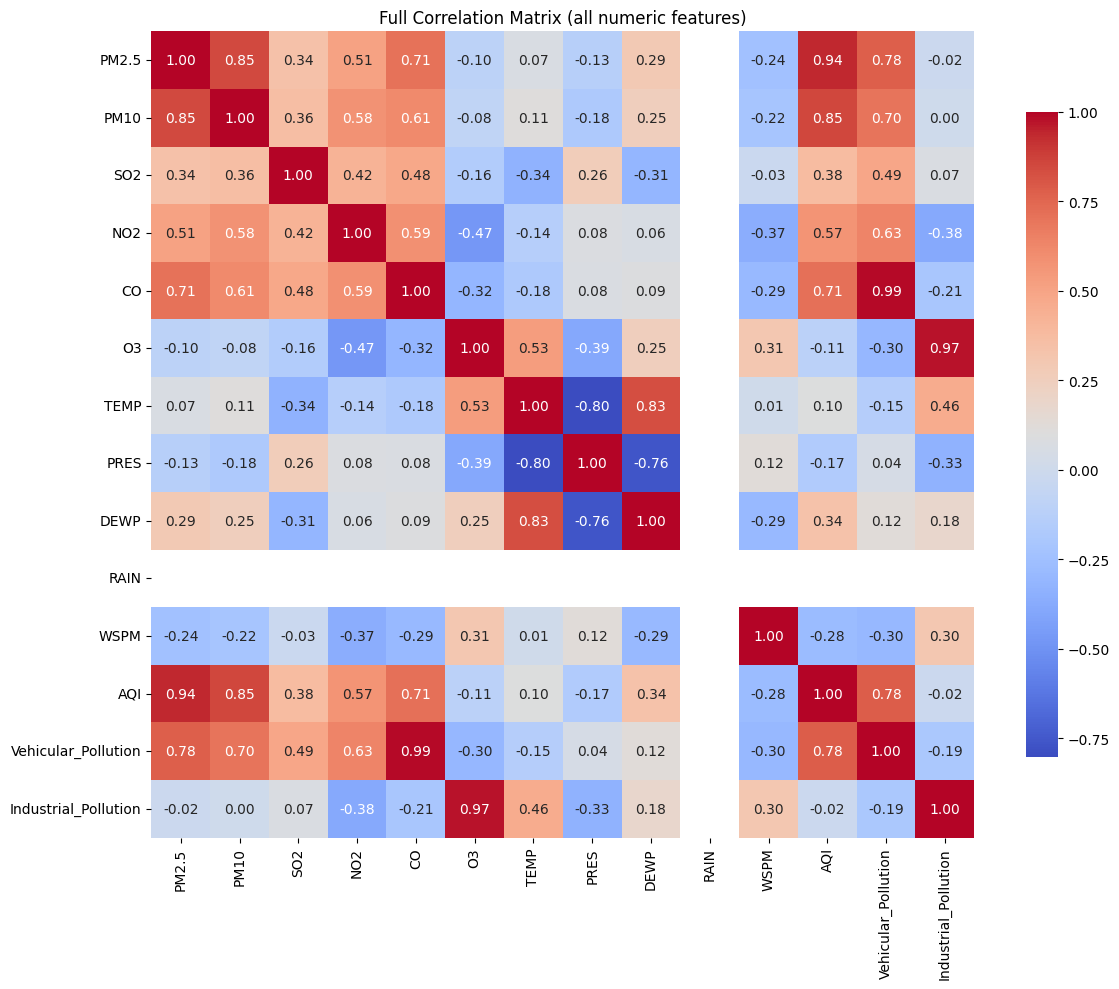

In [24]:
# 1. Display previews
print("=== Yearly Averages ===")
display(yearly.head())

print("\n=== Seasonal Averages ===")
display(seasonal)

print("\n=== Correlation: Pollutants & AQI ===")
display(corr_pollutants)

print("\n=== Correlation: Vehicular vs Industrial ===")
display(corr_vehicle_ind)

# 2. Full correlation matrix of all numeric features (excluding code cols)
numeric_cols = df.select_dtypes(include='number').columns.drop(['NO'])
corr_full = df[numeric_cols].corr()
corr_full.to_csv('full_correlation_matrix.csv')

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_full,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'shrink': .8}
)
plt.title("Full Correlation Matrix (all numeric features)")
plt.tight_layout()
plt.show()


NO  PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  \
DATETIME                                                                       
2013-03-01 20:00:00  21   13.0  25.0  12.0   5.0  1100.0  61.0   1.6  1027.1   
2013-03-01 21:00:00  22   15.0  23.0  14.0  13.0  1200.0  52.0   1.0  1028.1   
2013-03-01 22:00:00  23   16.0  28.0  16.0  19.0  1200.0  45.0   1.3  1028.4   
2013-03-01 23:00:00  24   16.0  28.0  14.0  20.0  1100.0  44.0   0.2  1028.6   
2013-03-02 00:00:00  25   14.0  18.0  24.0  43.0  1399.0  25.0  -0.3  1028.9   

                     DEWP  RAIN   WD  WSPM  STATION  AQI AQI_Category  \
DATETIME                                                                
2013-03-01 20:00:00 -18.4   0.0  ESE   1.9  Gucheng   53     Moderate   
2013-03-01 21:00:00 -17.4   0.0  SSE   0.7  Gucheng   57     Moderate   
2013-03-01 22:00:00 -17.6   0.0    E   1.0  Gucheng   59     Moderate   
2013-03-01 23:00:00 -17.6   0.0  ESE   1.1  Gucheng   59     Moderate   
2013-03-02 00:00:00 -18.0   0.0  ENE   1.4  Gucheng   55     Moderate   

                     Vehicular_Pollution  Industrial_Pollution SEASONS  
DATETIME                                                                
2013-03-01 20:00:00               285.75                  36.5  Spring  
2013-03-01 21:00:00               312.75                  33.0  Spring  
2013-03-01 22:00:00               315.75                  30.5  Spring  
2013-03-01 23:00:00               291.00                  29.0  Spring  
2013-03-02 00:00:00               368.50                  24.5  Spring

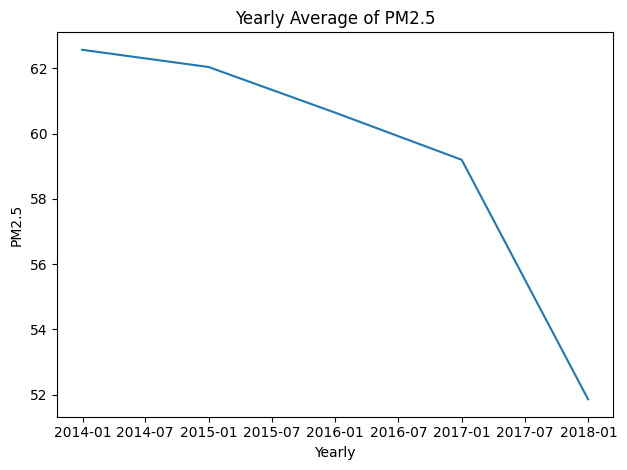

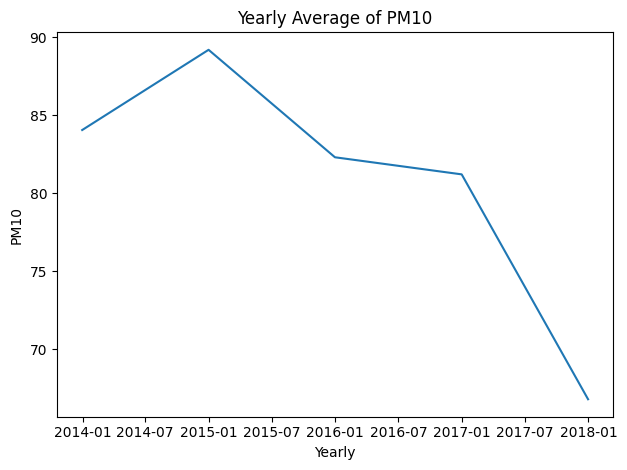

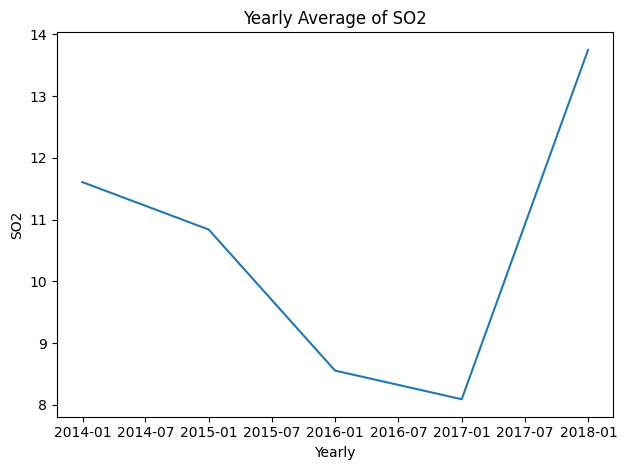

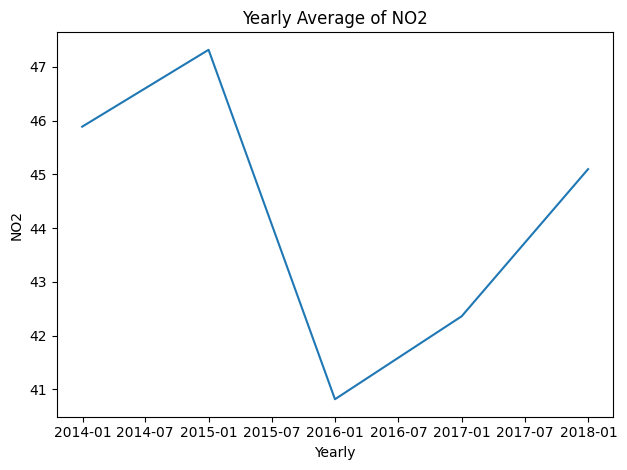

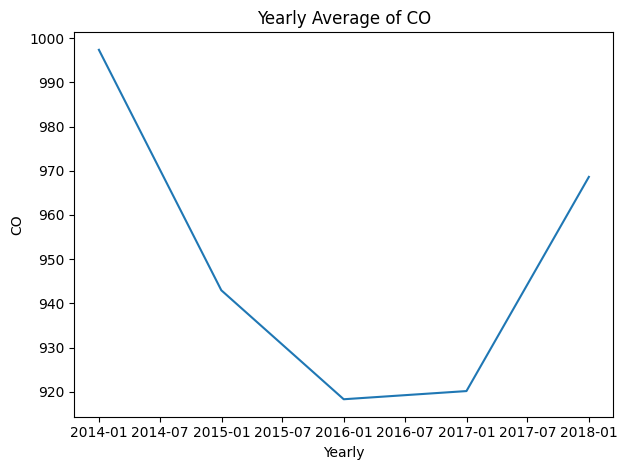

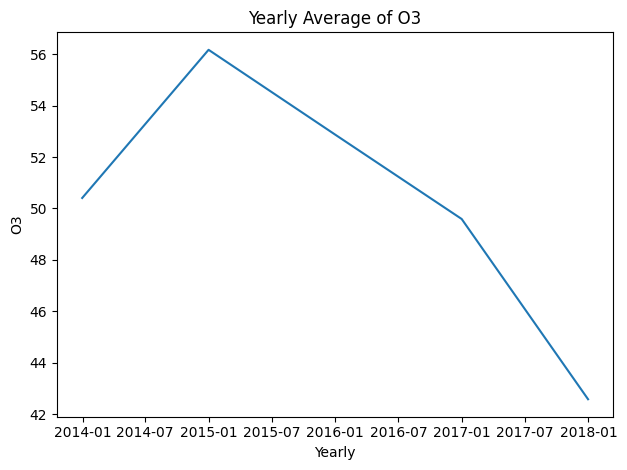

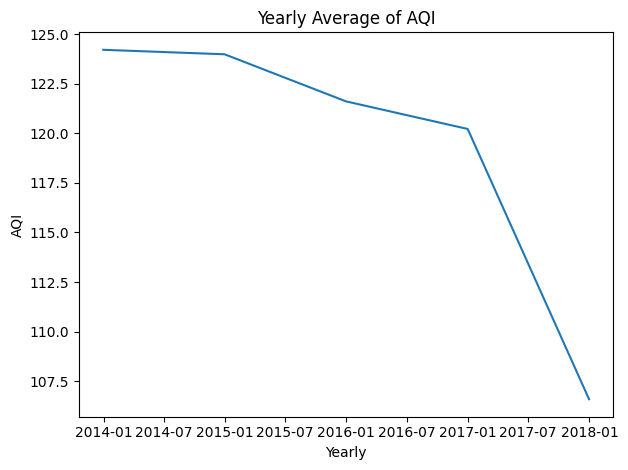

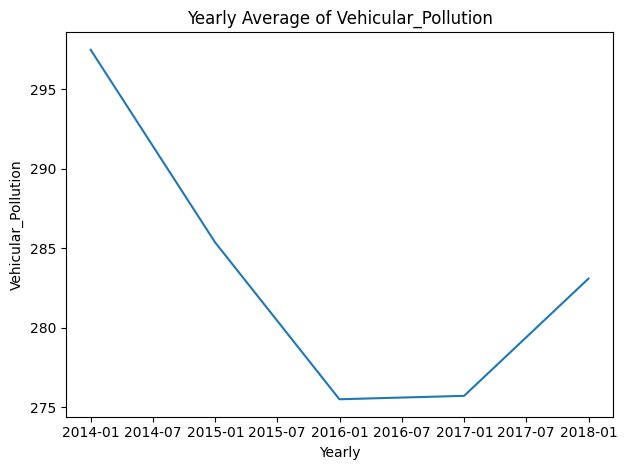

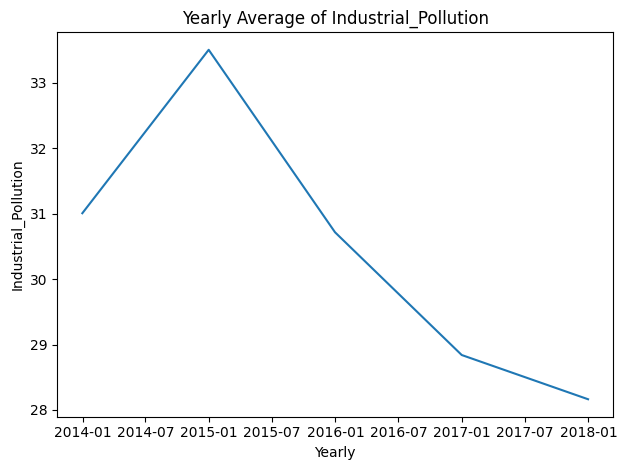

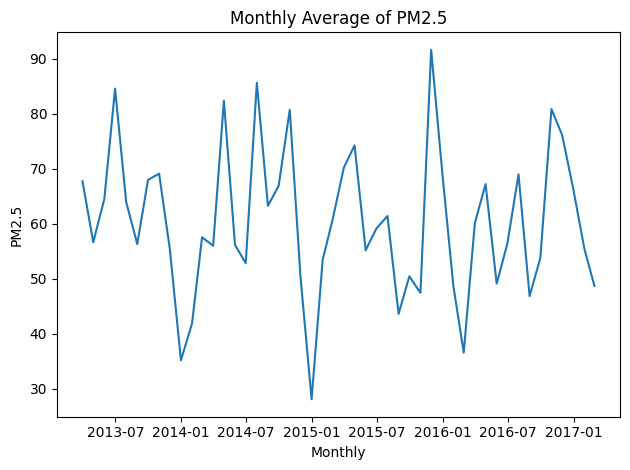

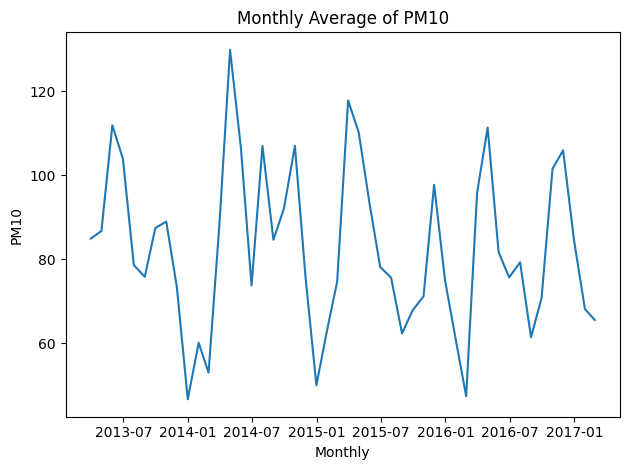

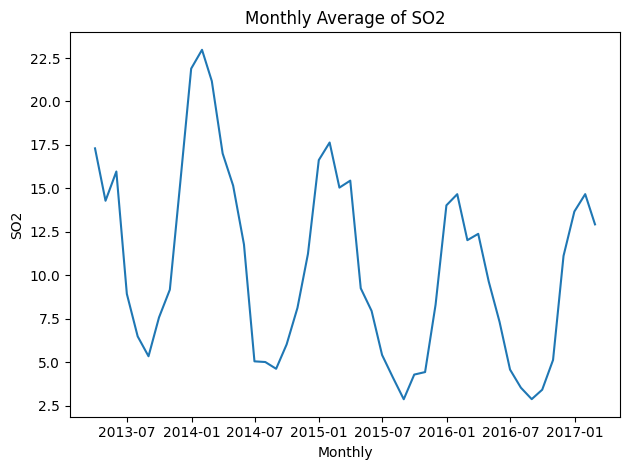

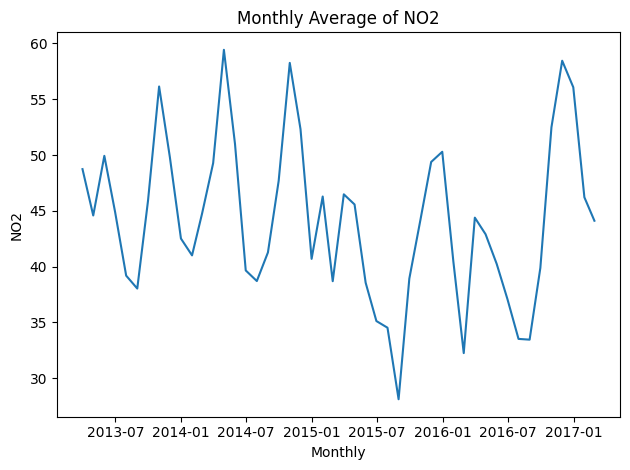

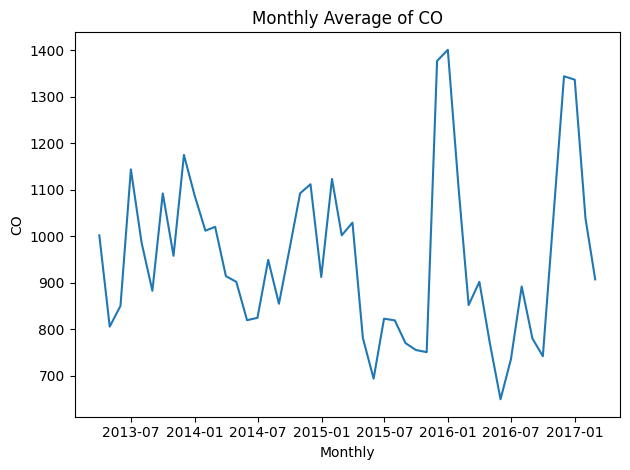

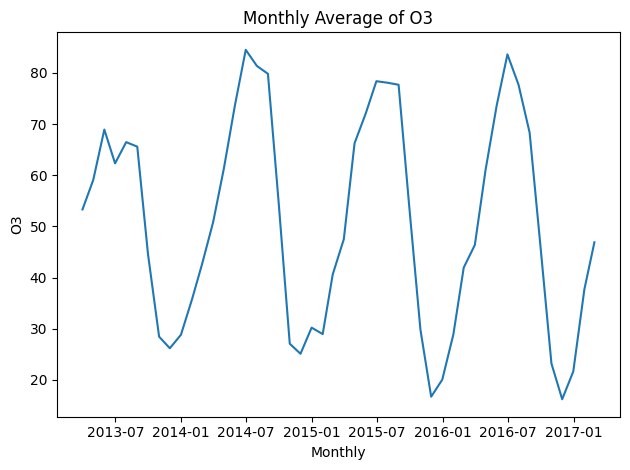

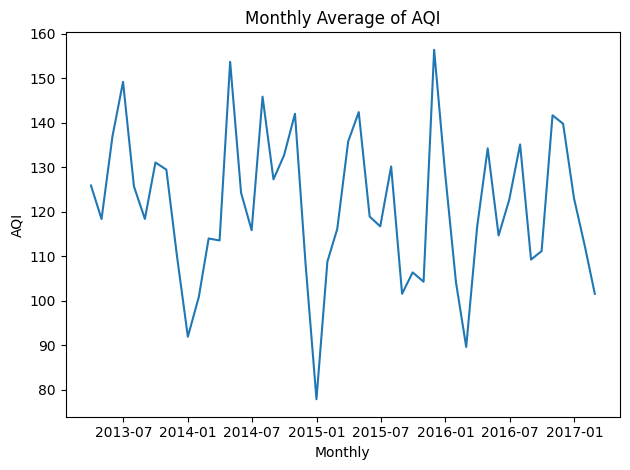

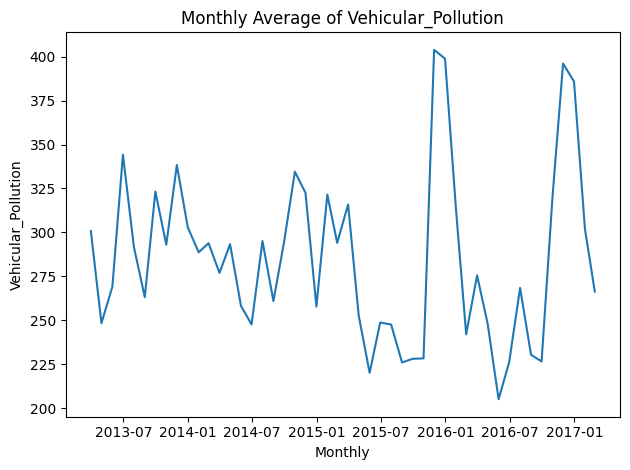

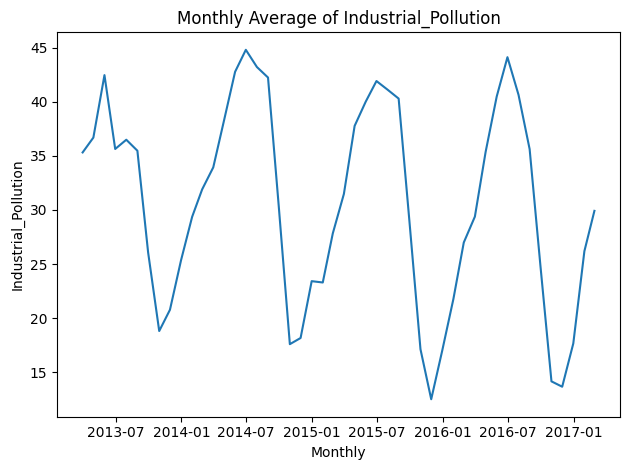

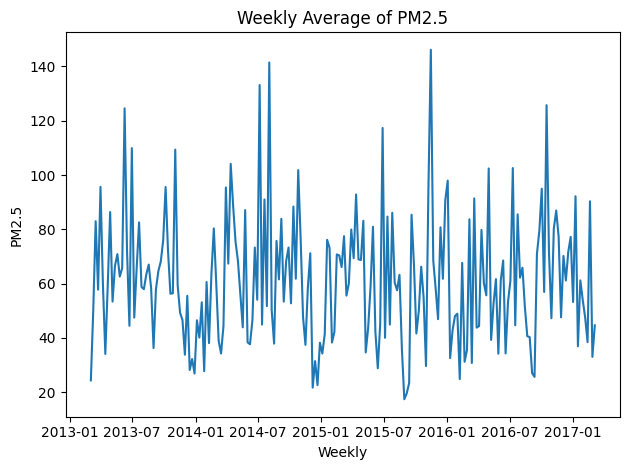

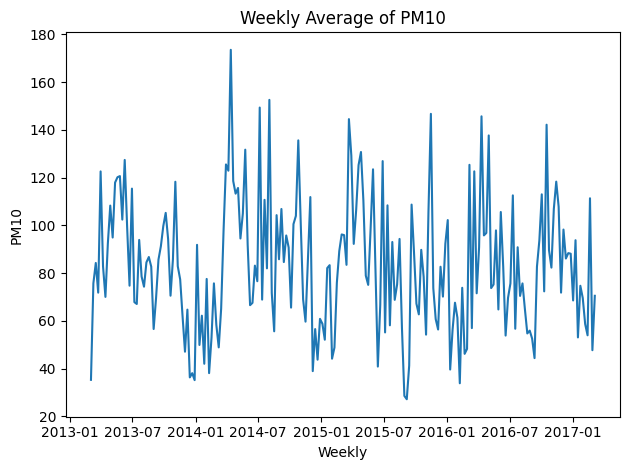

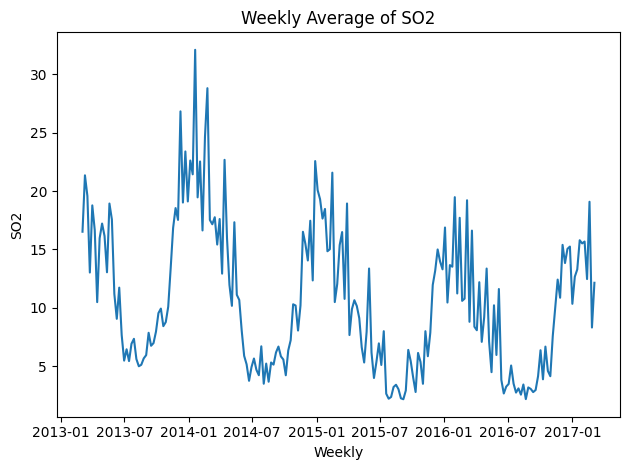

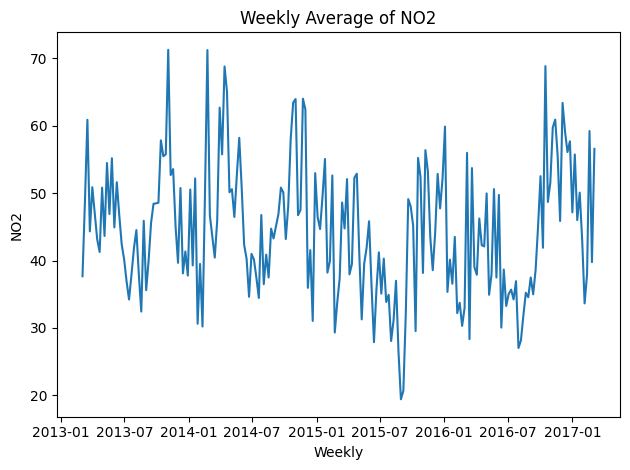

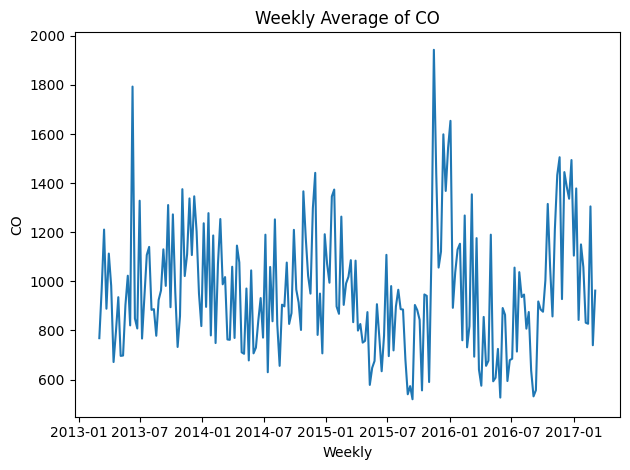

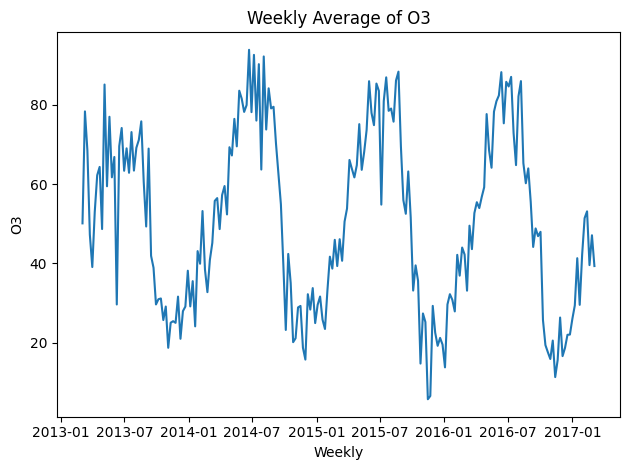

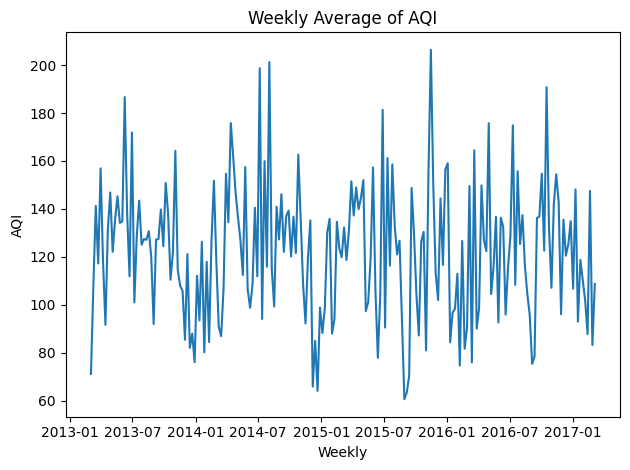

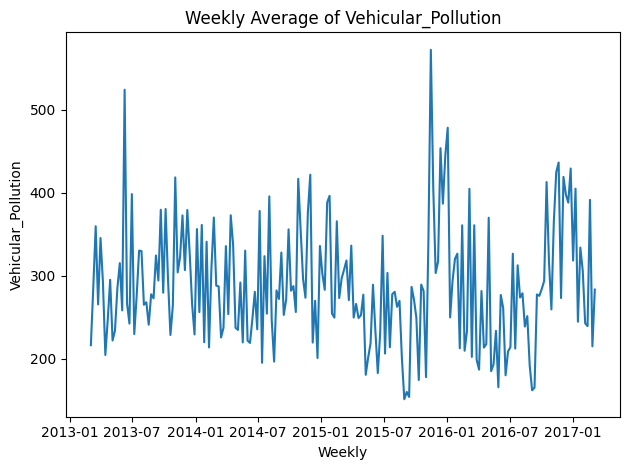

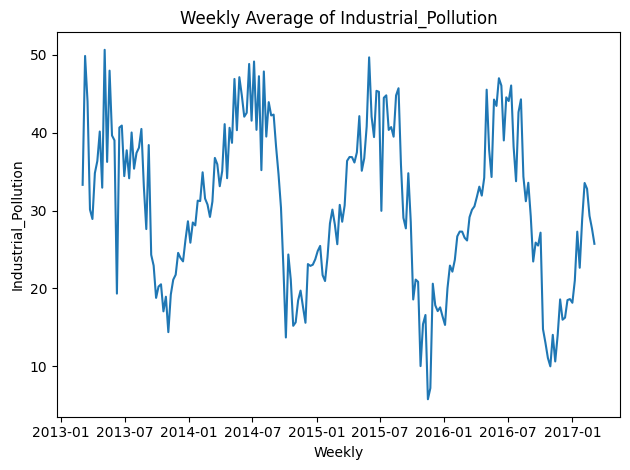

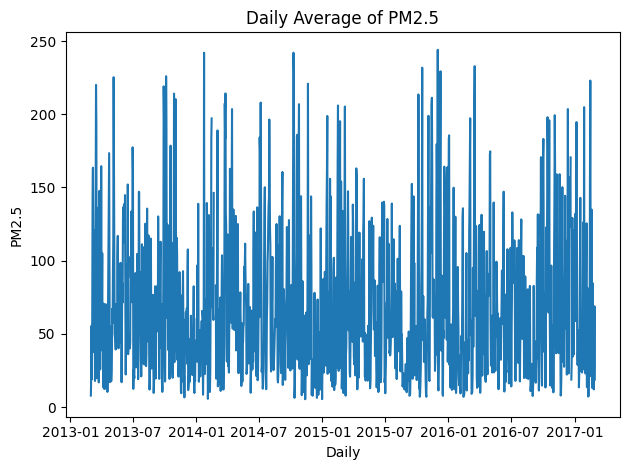

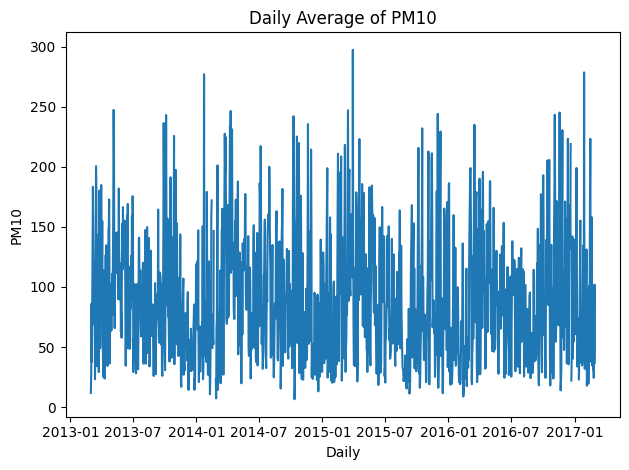

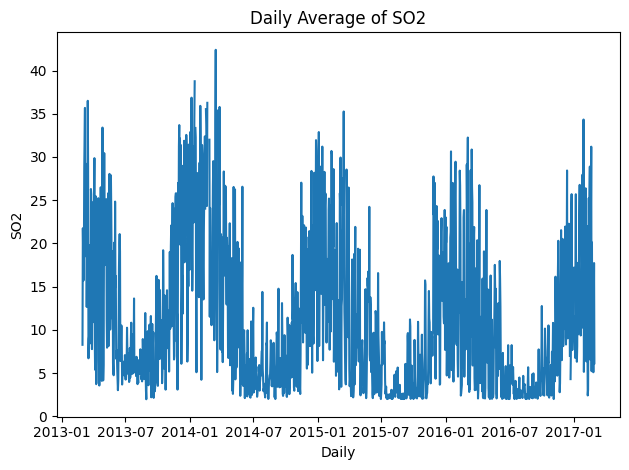

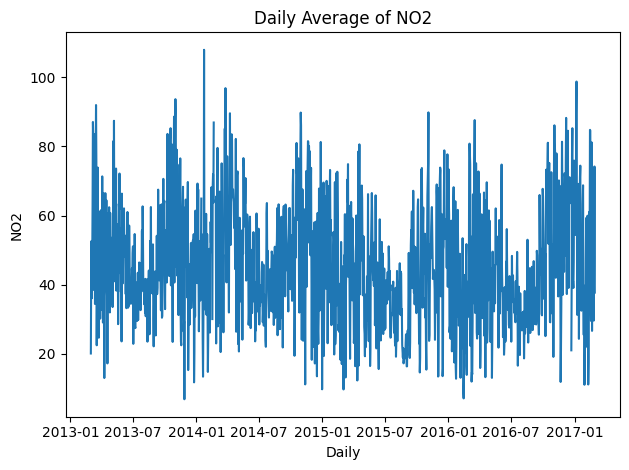

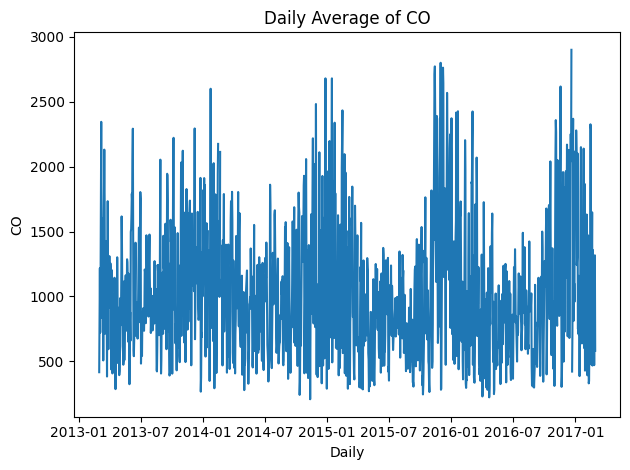

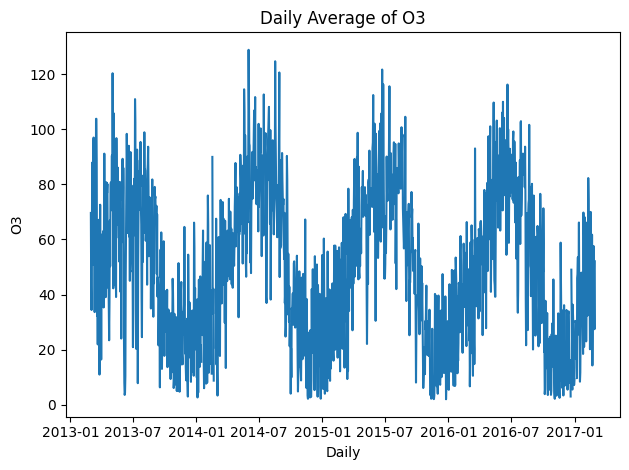

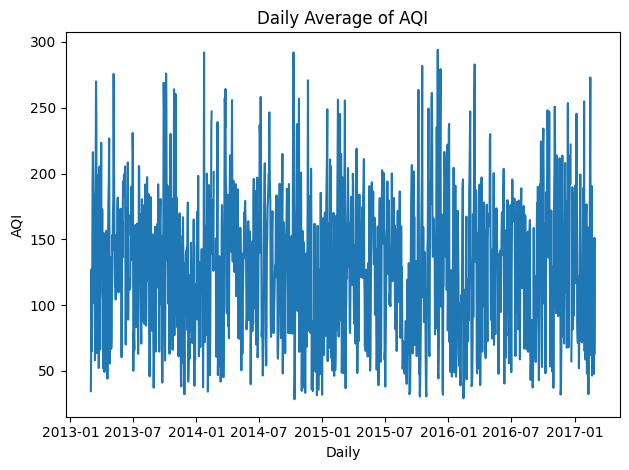

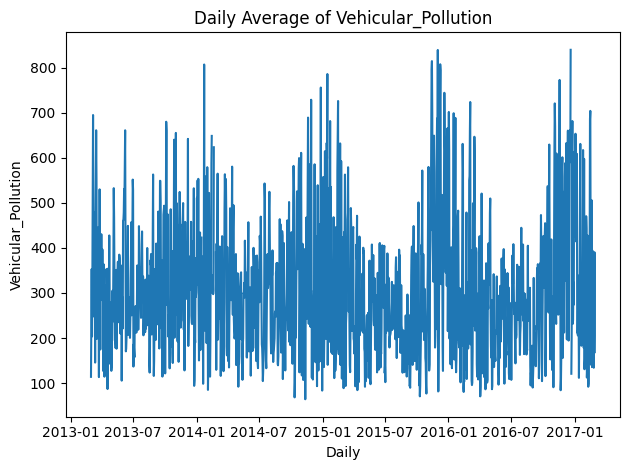

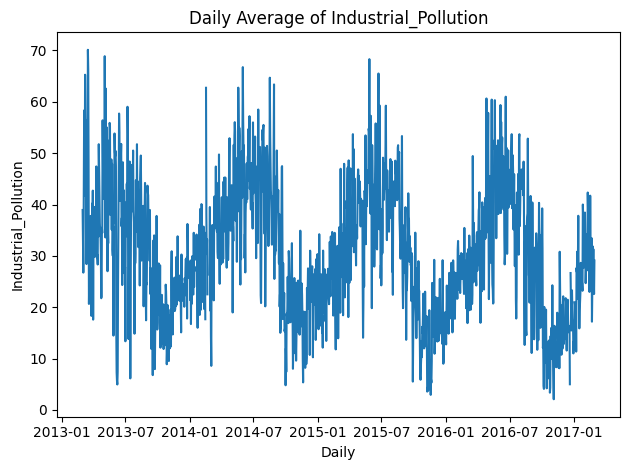

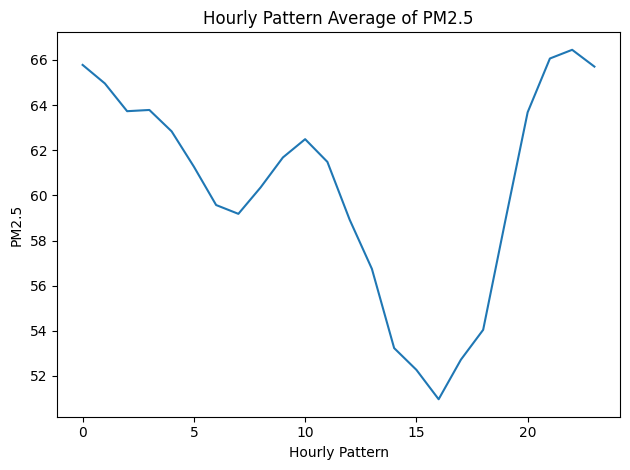

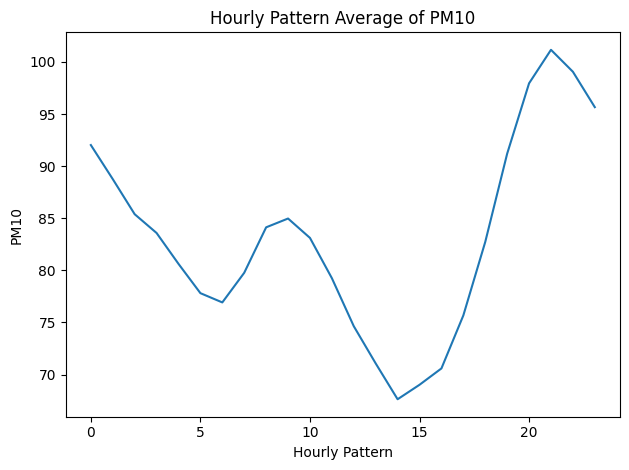

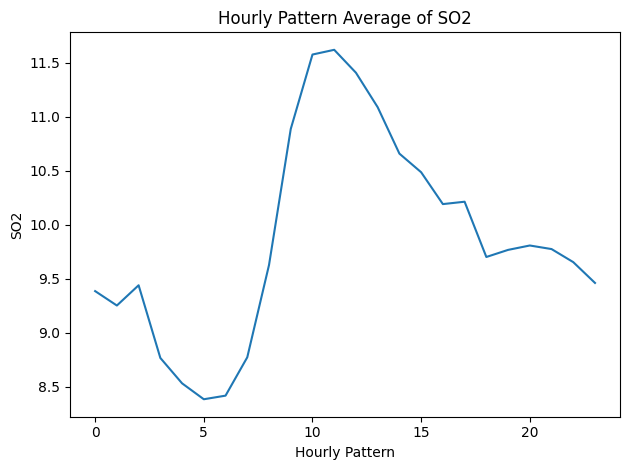

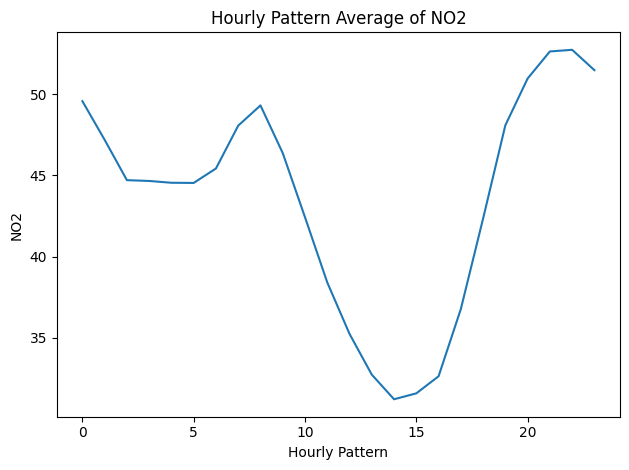

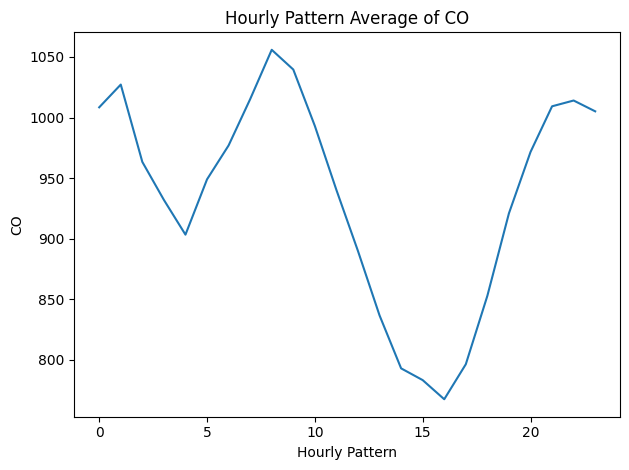

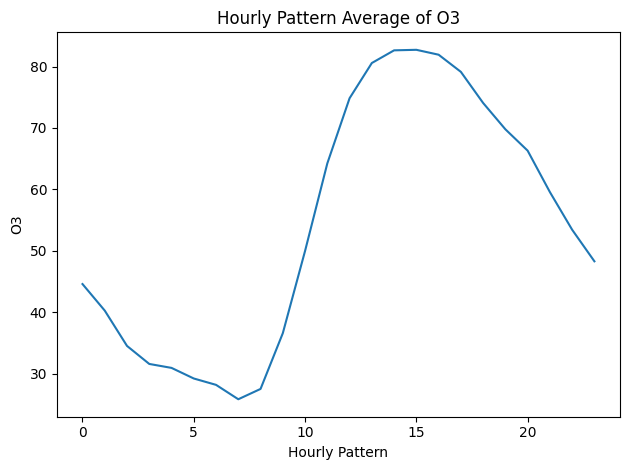

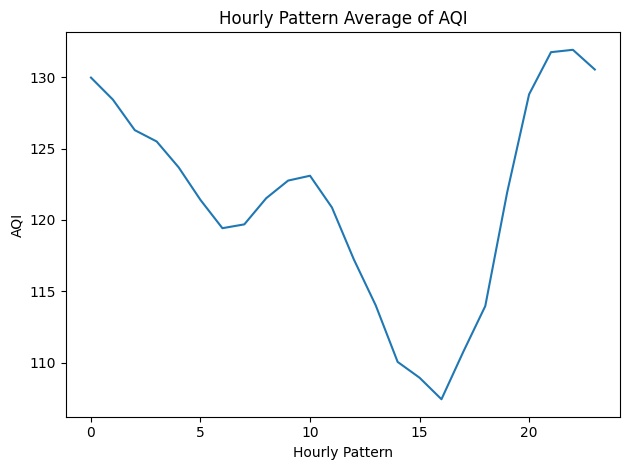

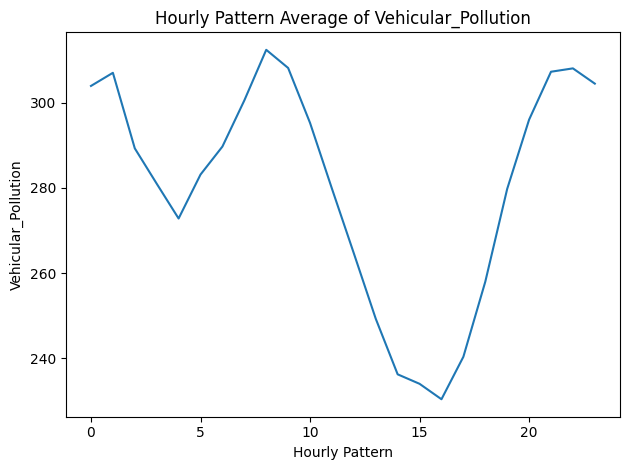

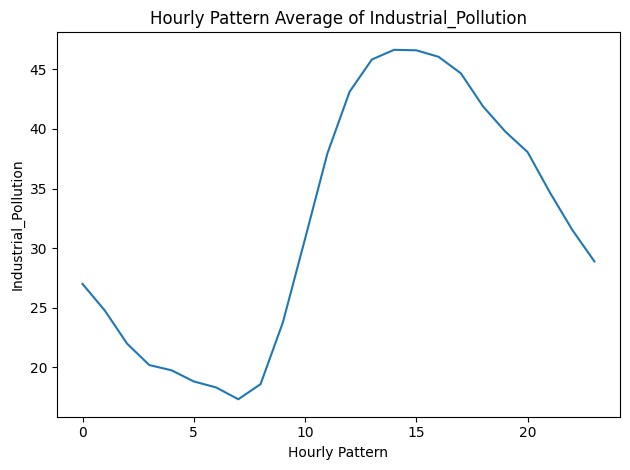

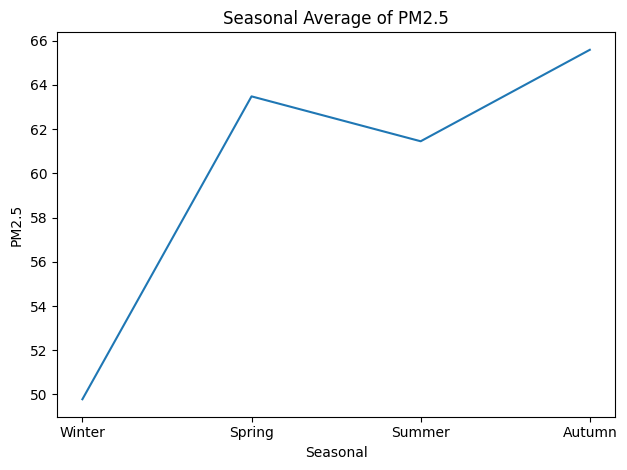

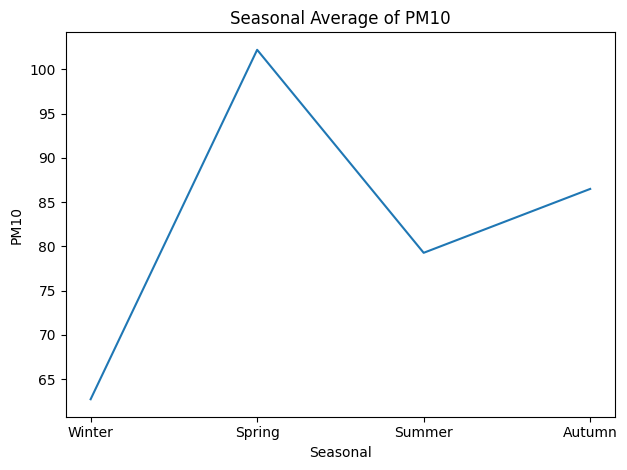

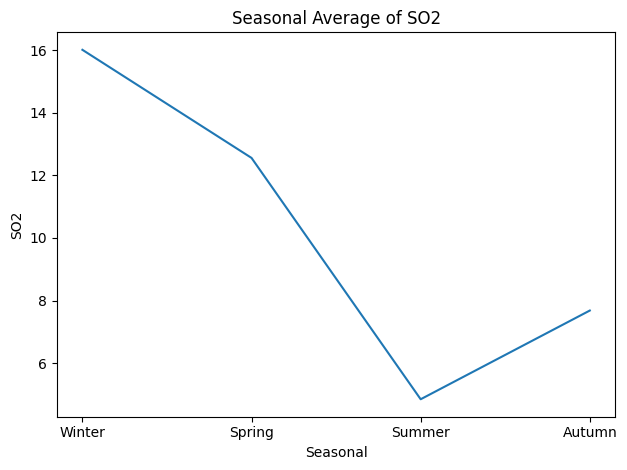

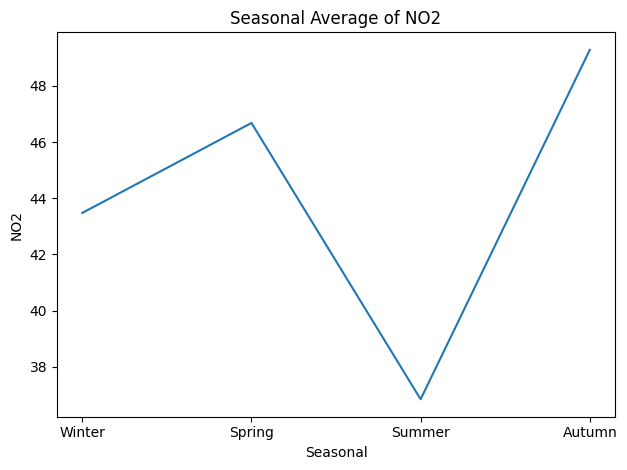

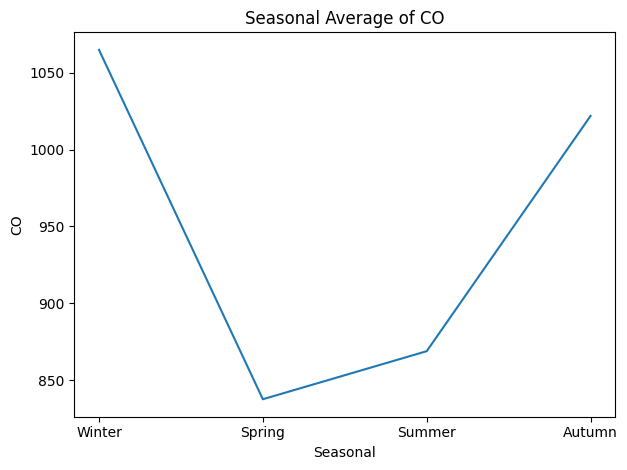

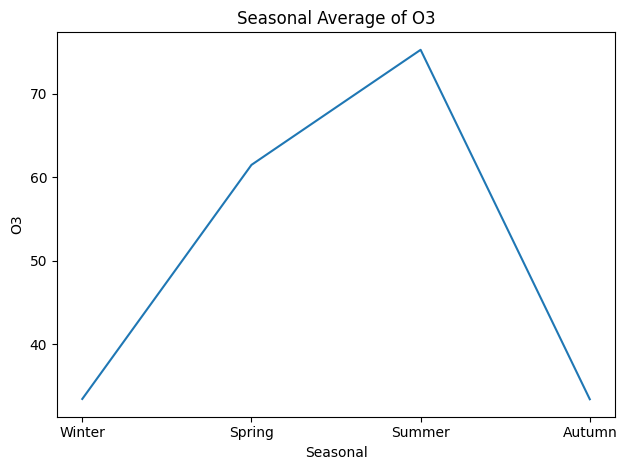

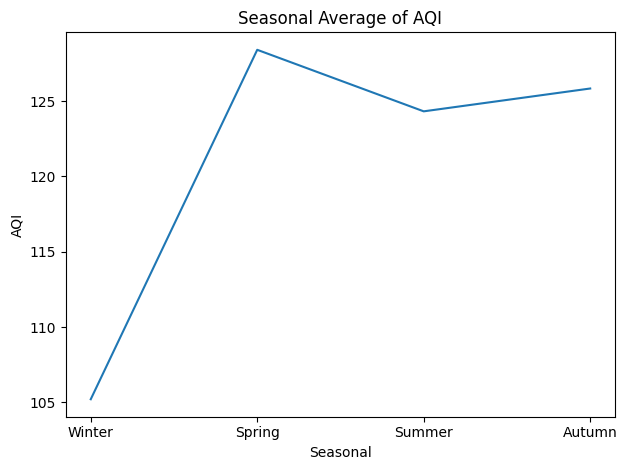

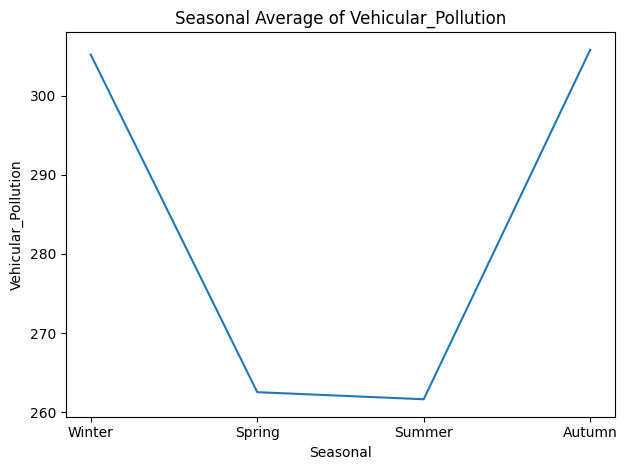

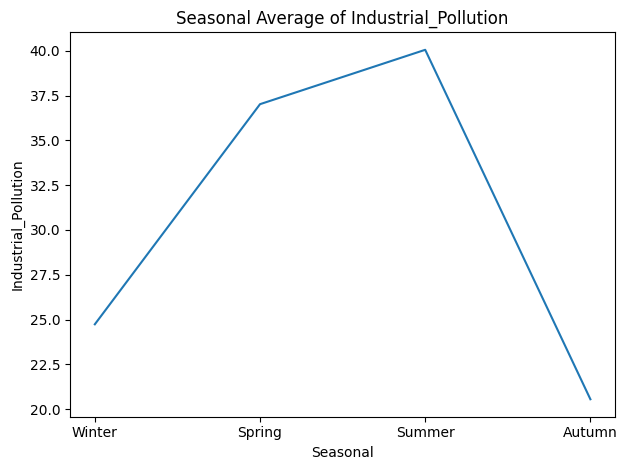

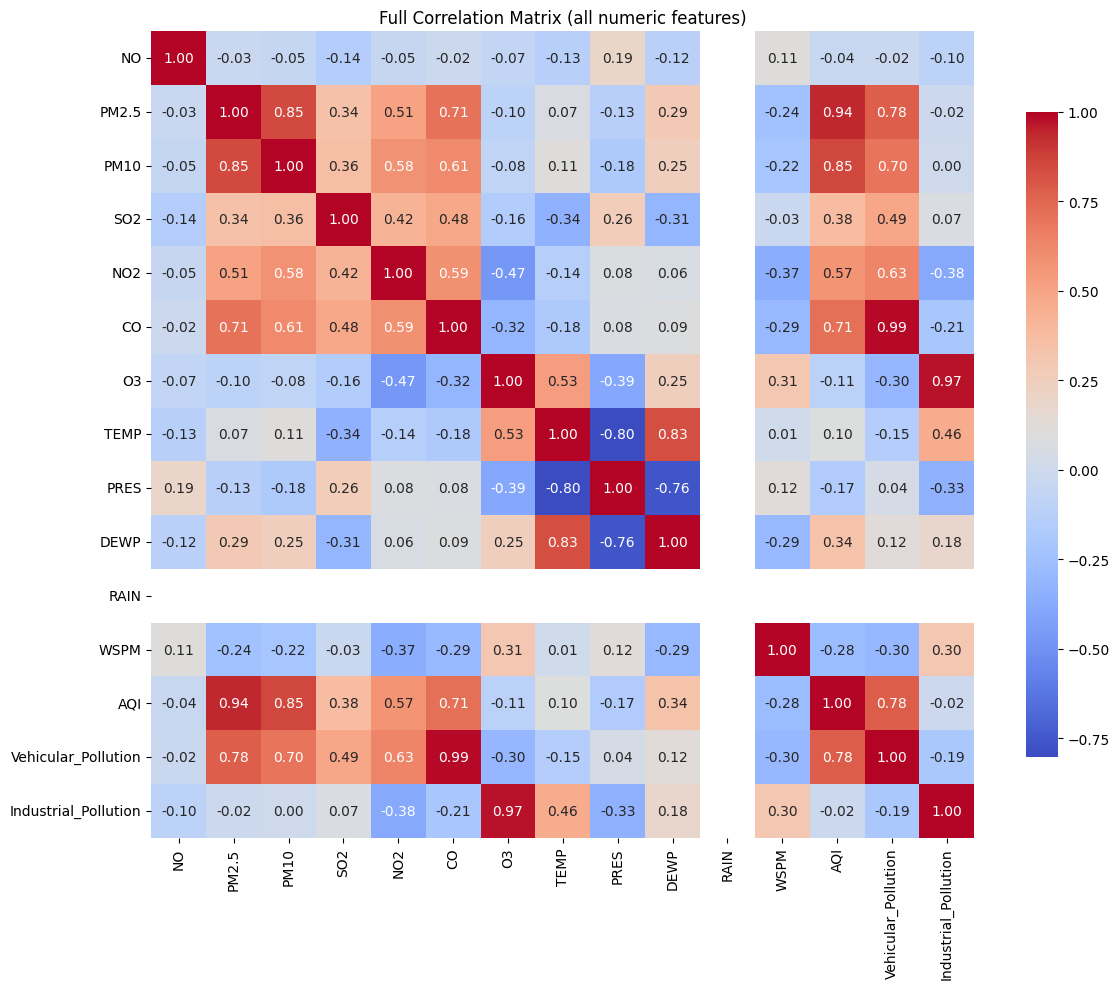

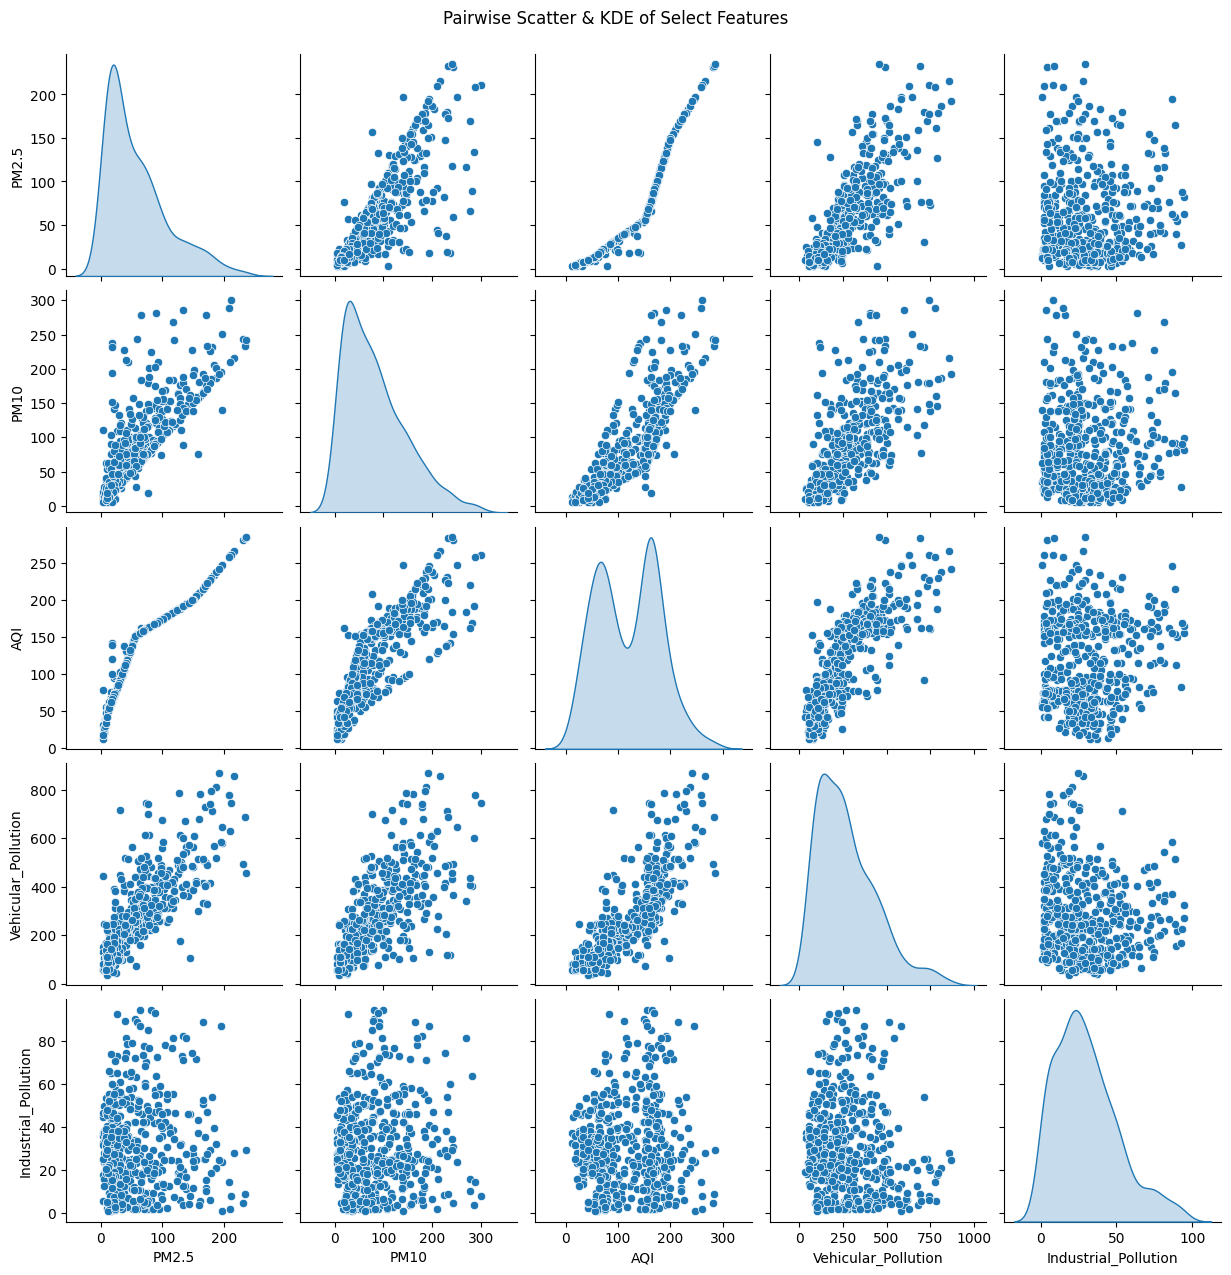

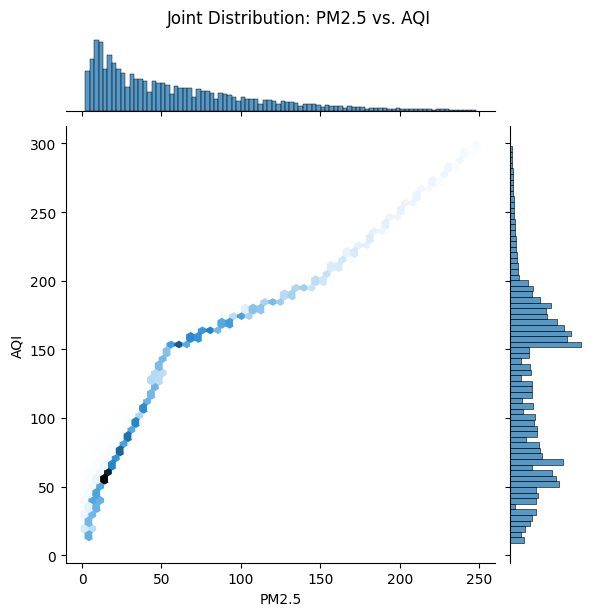

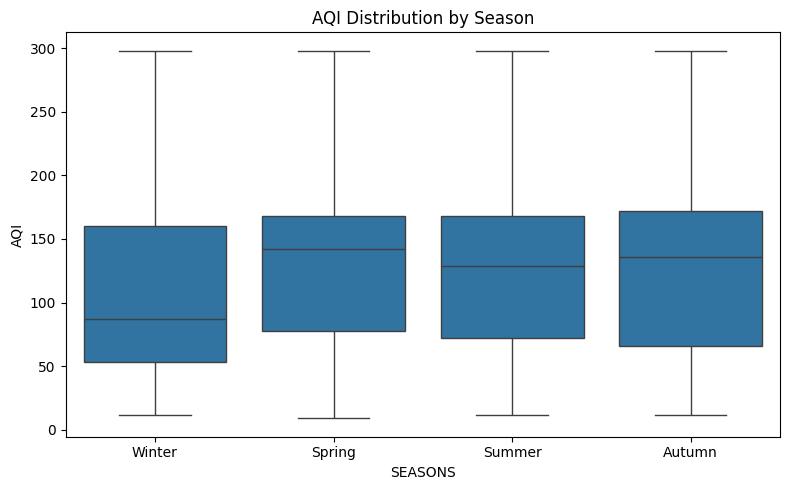

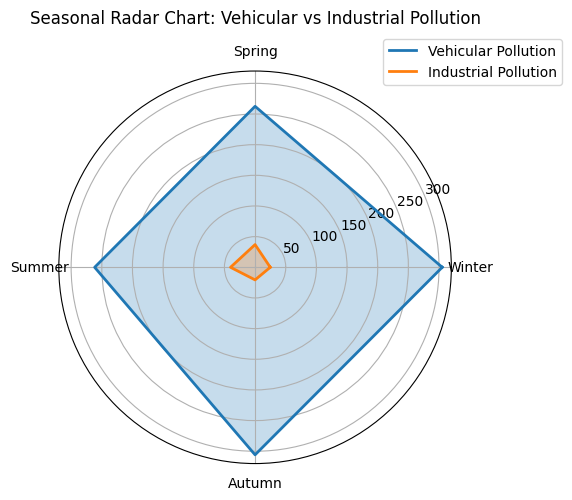

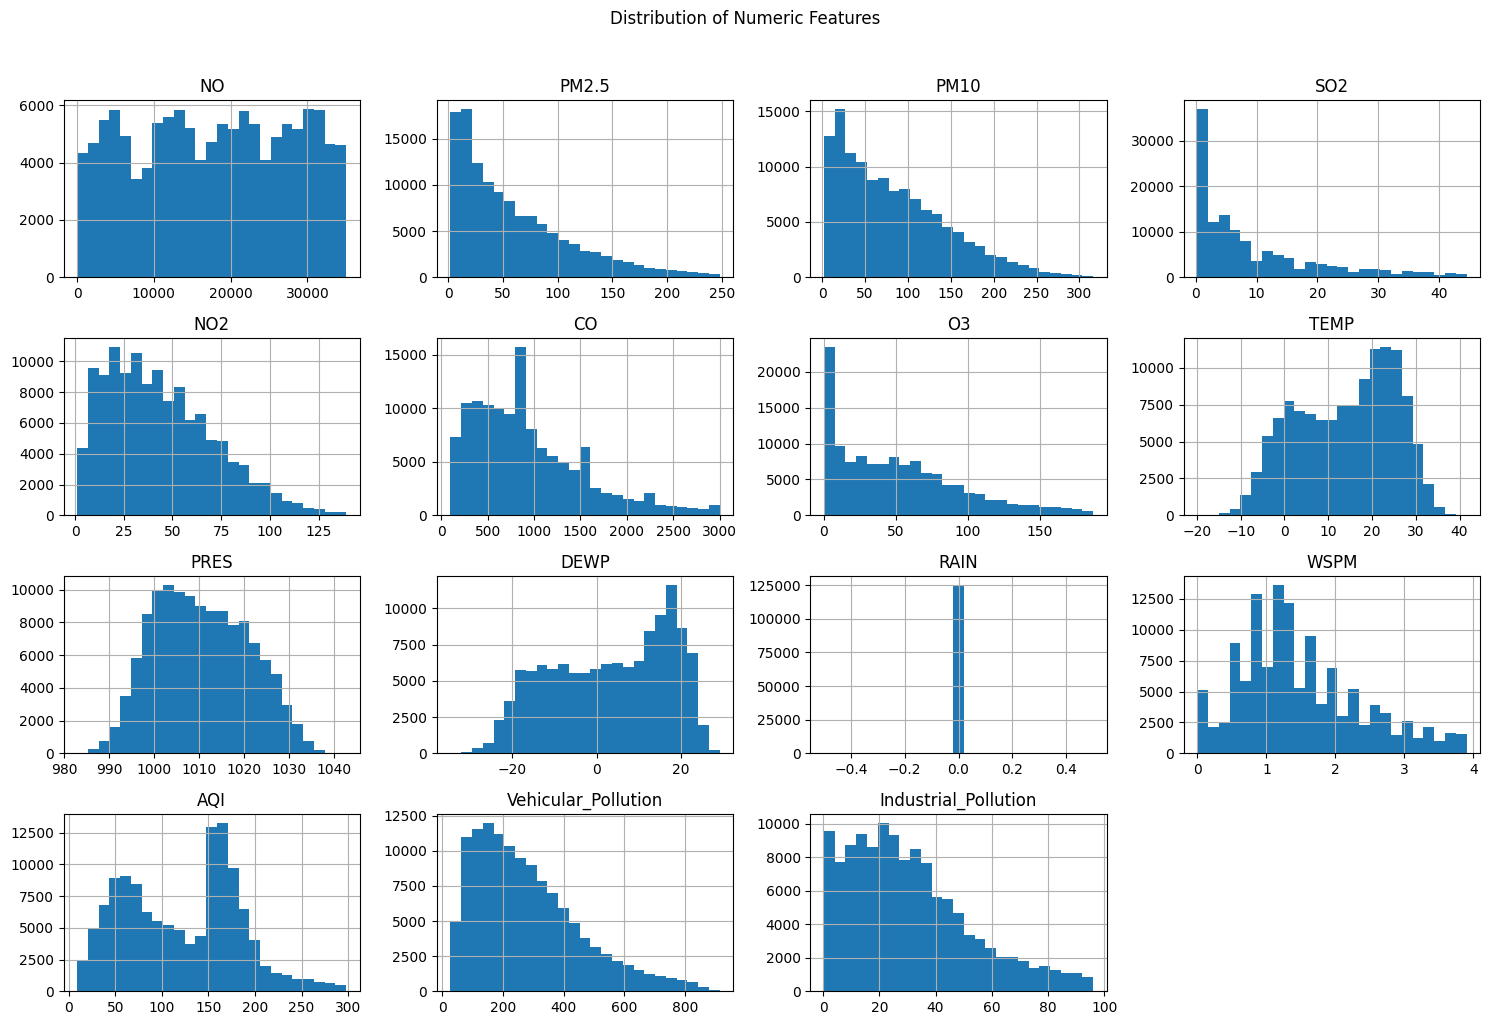

<ipython-input-25-7ad14bd9bf3c>:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'STATION'])[col]


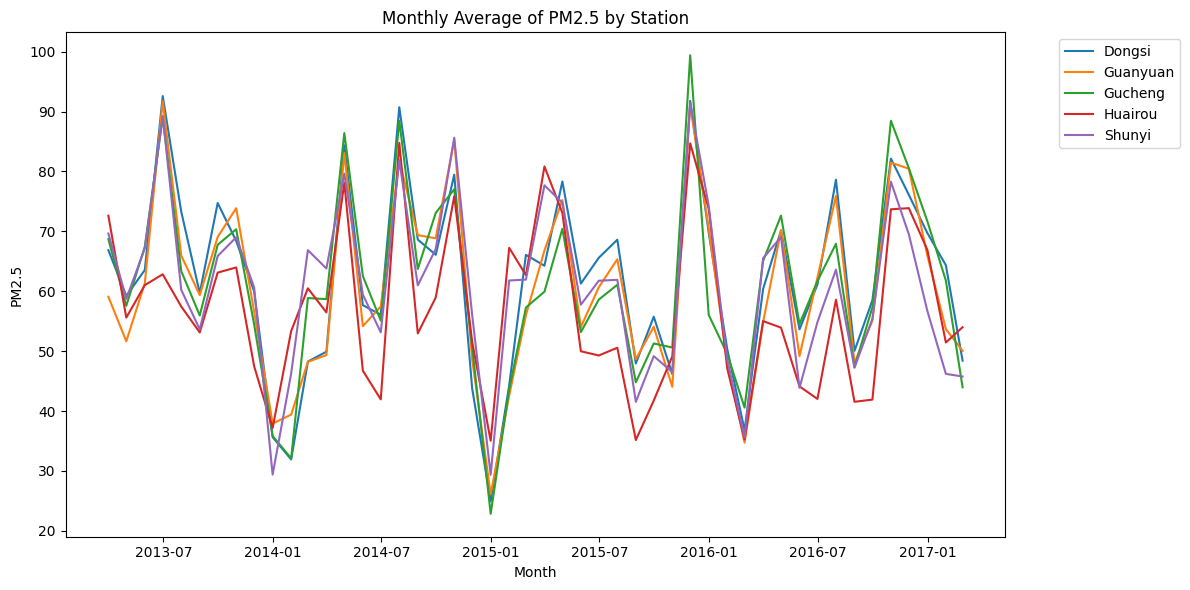

<ipython-input-25-7ad14bd9bf3c>:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'STATION'])[col]


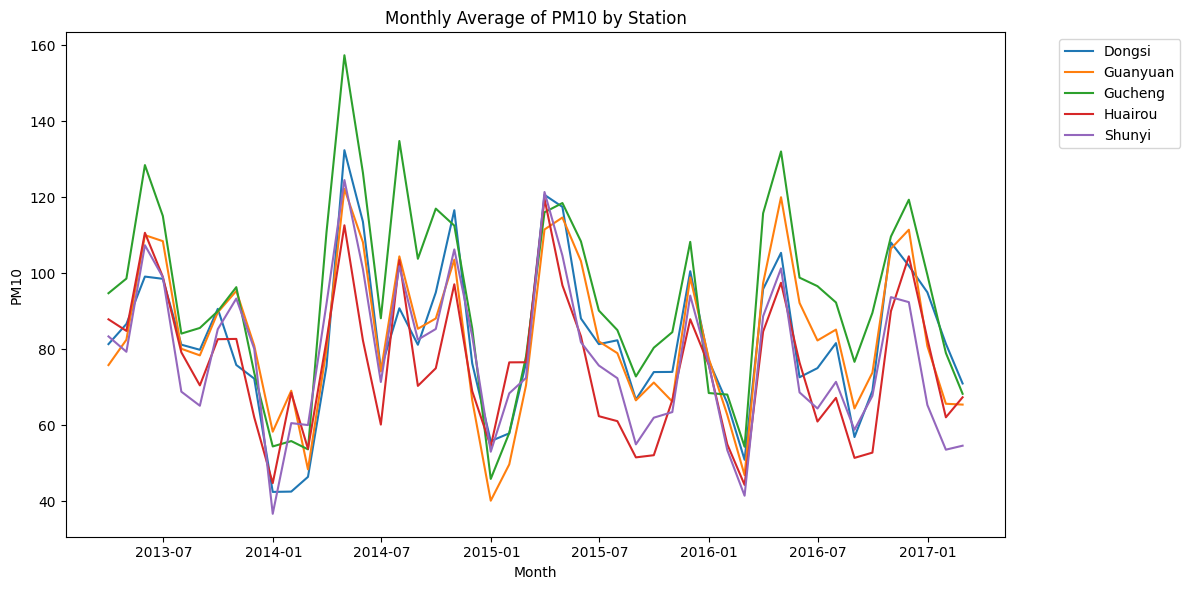

<ipython-input-25-7ad14bd9bf3c>:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'STATION'])[col]


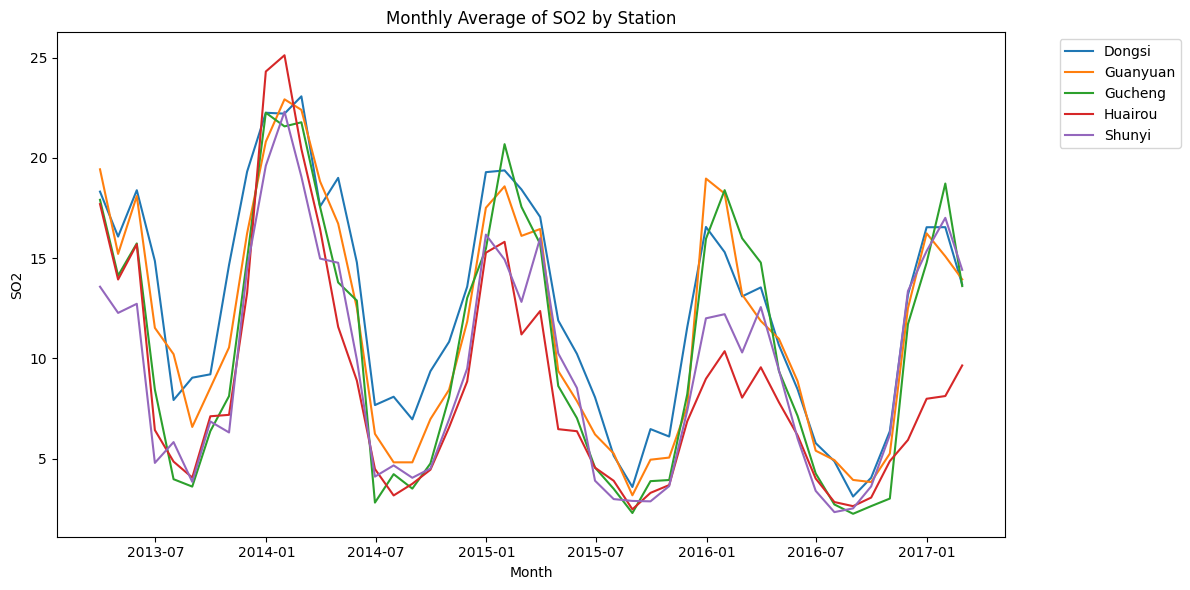

<ipython-input-25-7ad14bd9bf3c>:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'STATION'])[col]


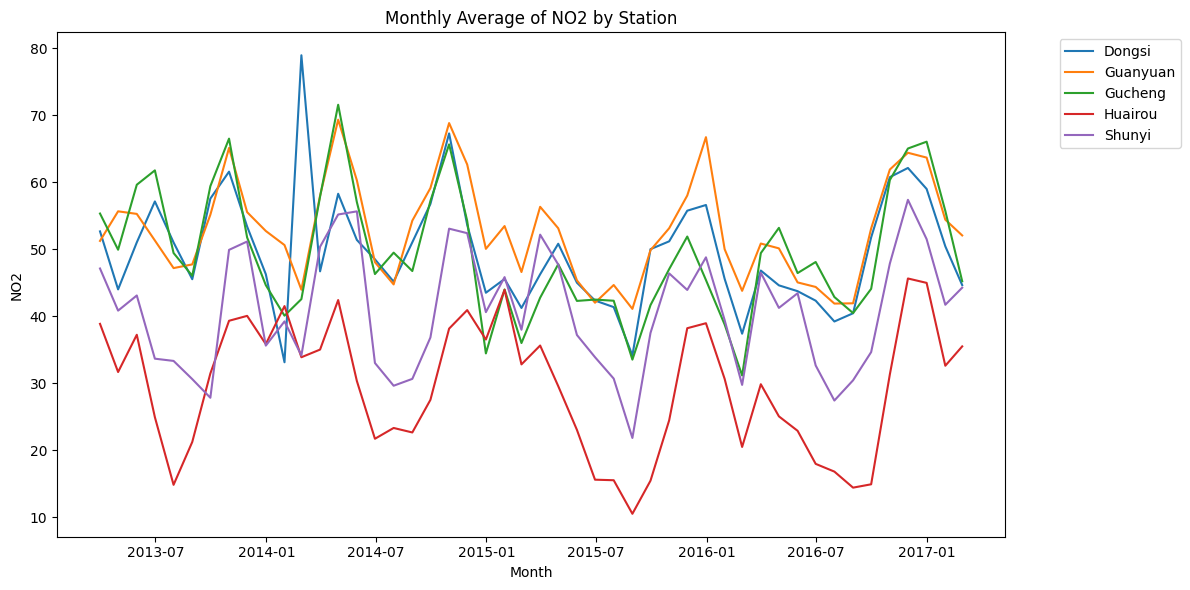

<ipython-input-25-7ad14bd9bf3c>:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'STATION'])[col]


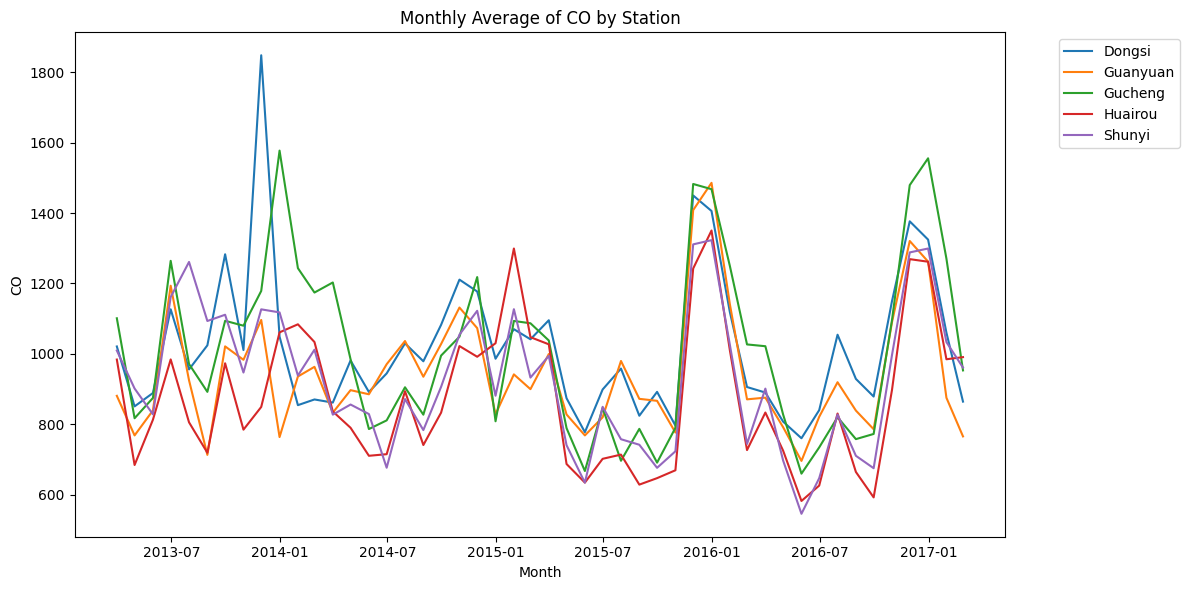

<ipython-input-25-7ad14bd9bf3c>:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'STATION'])[col]


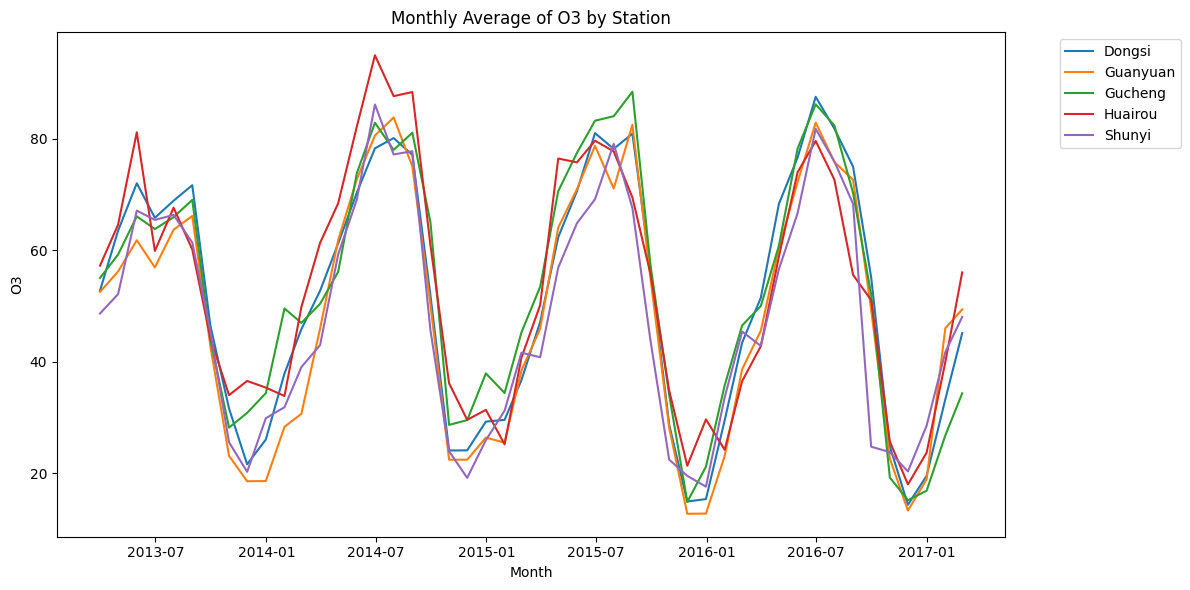

<ipython-input-25-7ad14bd9bf3c>:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'STATION'])[col]


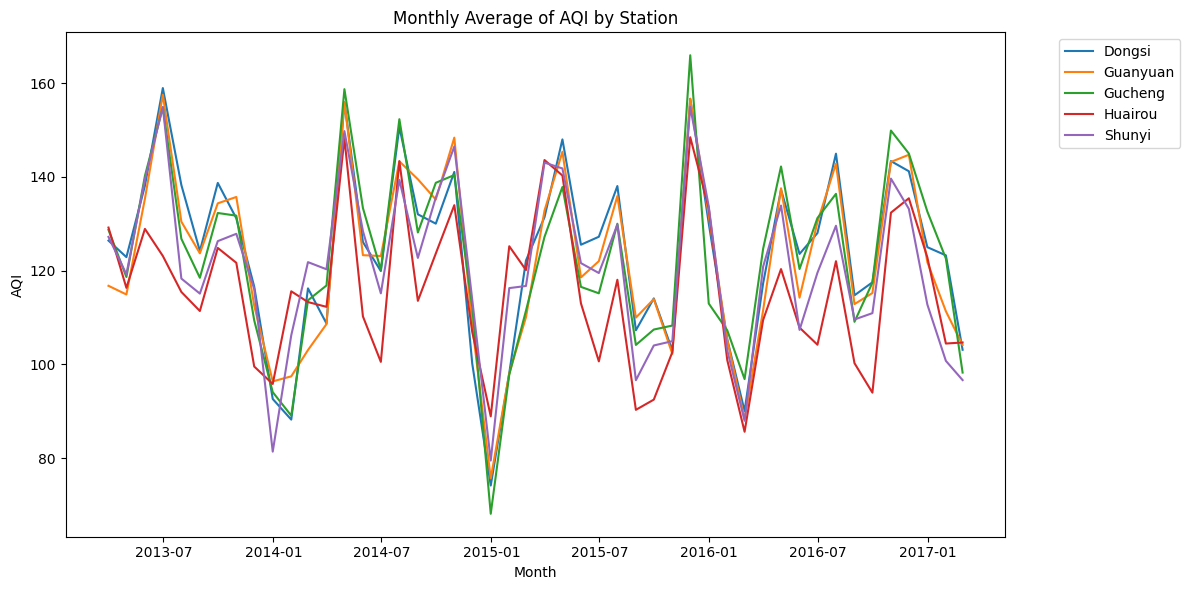

<ipython-input-25-7ad14bd9bf3c>:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'STATION'])[col]


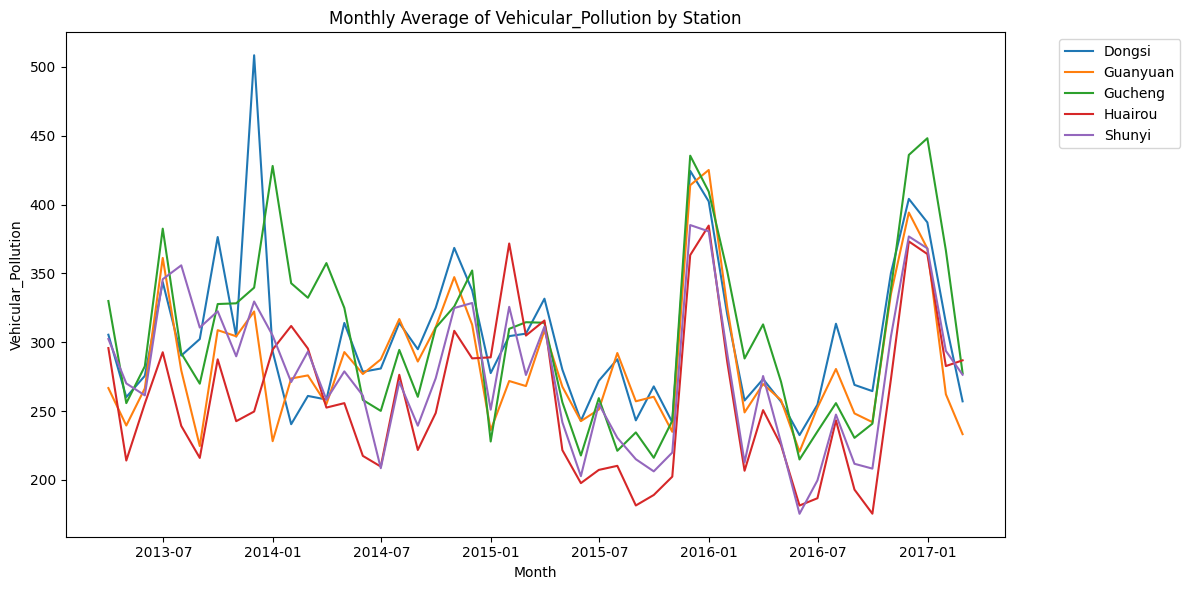

<ipython-input-25-7ad14bd9bf3c>:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'STATION'])[col]


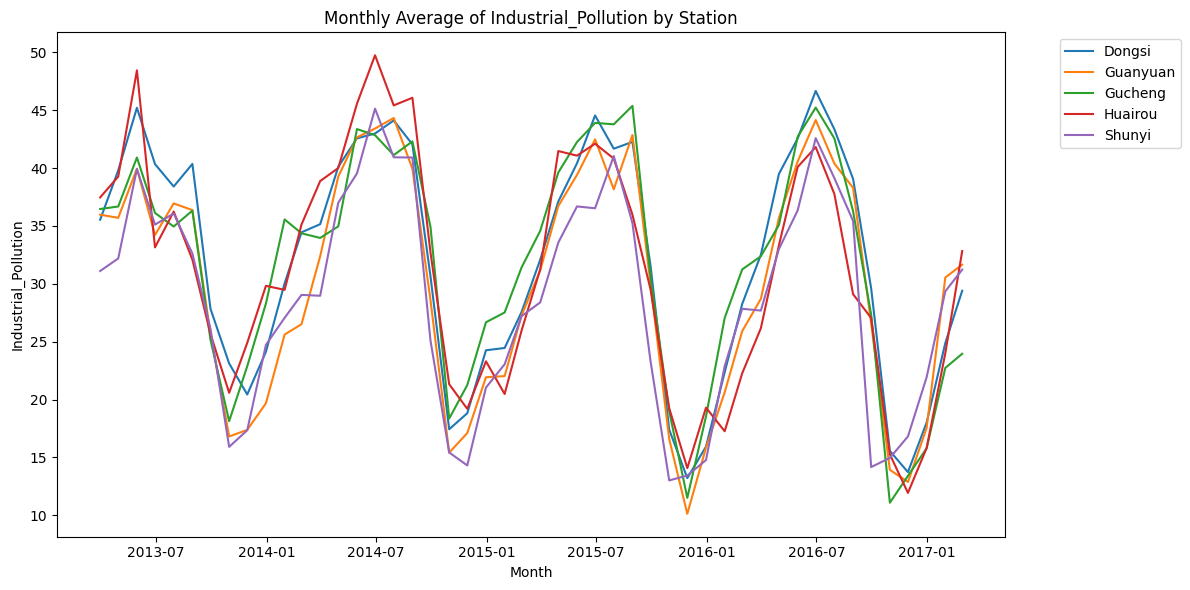

In [25]:
# 1. Loaded the enriched dataset
df = pd.read_csv('merged_data_eda.csv', parse_dates=['DATETIME'], index_col='DATETIME')
display(df.head())

# 2. Recomputed numeric-only time summaries
yearly         = df.resample('YE').mean(numeric_only=True)
monthly        = df.resample('ME').mean(numeric_only=True)
weekly         = df.resample('W').mean(numeric_only=True)
daily          = df.resample('D').mean(numeric_only=True)
hourly_pattern = df.groupby(df.index.hour).mean(numeric_only=True)
seasonal       = df.groupby('SEASONS').mean(numeric_only=True).reindex(['Winter','Spring','Summer','Autumn'])

# 3. Time‐series line plots for each pollutant, AQI, and grouped features
to_plot = [
    'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQI',
    'Vehicular_Pollution', 'Industrial_Pollution'
]
for label, grouping in [
    ('Yearly', yearly),
    ('Monthly', monthly),
    ('Weekly', weekly),
    ('Daily', daily),
    ('Hourly Pattern', hourly_pattern),
    ('Seasonal', seasonal)
]:
    for col in to_plot:
        plt.figure()
        plt.plot(grouping.index, grouping[col])
        plt.title(f'{label} Average of {col}')
        plt.xlabel(label)
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

# 4. Full correlation matrix (excluding ‘No’)
numeric_cols = df.select_dtypes(include='number').columns.drop(['No'], errors='ignore')
corr_full = df[numeric_cols].corr()
corr_full.to_csv('full_correlation_matrix.csv')

plt.figure(figsize=(12,10))
sns.heatmap(corr_full, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'shrink': .8})
plt.title("Full Correlation Matrix (all numeric features)")
plt.tight_layout()
plt.show()

# 5. Pairplot for key relationships
sample = df[['PM2.5','PM10','AQI','Vehicular_Pollution','Industrial_Pollution']].sample(500, random_state=42)
sns.pairplot(sample, diag_kind='kde')
plt.suptitle("Pairwise Scatter & KDE of Select Features", y=1.02)
plt.show()

# 6. Joint plot for highest‐correlated pair (PM2.5 vs AQI)
sns.jointplot(x='PM2.5', y='AQI', data=df, kind='hex', height=6)
plt.suptitle("Joint Distribution: PM2.5 vs. AQI", y=1.02)
plt.show()

# 7. Boxplot of AQI by season
plt.figure(figsize=(8,5))
sns.boxplot(x='SEASONS', y='AQI', data=df, order=['Winter','Spring','Summer','Autumn'])
plt.title("AQI Distribution by Season")
plt.tight_layout()
plt.show()

# 8. Star chart of Vehicular vs Industrial Pollution
easonal = df.groupby('SEASONS').mean(numeric_only=True).reindex(
    ['Winter','Spring','Summer','Autumn']
)
veh = seasonal['Vehicular_Pollution'].values
ind = seasonal['Industrial_Pollution'].values
seasons = seasonal.index.tolist()
# radar chart angles
angles = np.linspace(0, 2 * np.pi, len(seasons), endpoint=False).tolist()
angles += angles[:1]  # close the loop
# Close the values
veh_values = veh.tolist() + veh[:1].tolist()
ind_values = ind.tolist() + ind[:1].tolist()
# Start plot
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, veh_values, label='Vehicular Pollution', linewidth=2)
ax.fill(angles, veh_values, alpha=0.25)
ax.plot(angles, ind_values, label='Industrial Pollution', linewidth=2)
ax.fill(angles, ind_values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(seasons)
plt.title("Seasonal Radar Chart: Vehicular vs Industrial Pollution", y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

# 9. Histograms of all numeric features
df[numeric_cols].hist(bins=25, figsize=(15,10))
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

# 10. Monthly time series of each feature by station
for col in to_plot:
    monthly_station = (
        df
        .groupby([pd.Grouper(freq='M'), 'STATION'])[col]
        .mean()
        .reset_index()
    )
    plt.figure(figsize=(12,6))
    sns.lineplot(
        data=monthly_station,
        x='DATETIME', y=col,
        hue='STATION', legend='full',
        palette='tab10'
    )
    plt.title(f"Monthly Average of {col} by Station")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
    plt.tight_layout()
    plt.show()


## Task 03: Model Building


In [ ]:
# 1. Load the enriched dataset
df = pd.read_csv('merged_data_eda.csv', parse_dates=['DATETIME'], index_col='DATETIME')

# 2. Encode categorical columns with consistent IDs
for col in ['WD', 'STATION', 'AQI_Category', 'SEASONS']:
    uniques = sorted(df[col].unique())
    mapping = {v: i for i, v in enumerate(uniques)}
    df[col + '_code'] = df[col].map(mapping)

# 3. Define feature matrix X and target y (predict AQI)
y = df['AQI'].values
drop_cols = ['AQI','WD','STATION','AQI_Category','SEASONS','NO']
X = df.drop(columns=drop_cols)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl')

# 6. Variable selection via SelectKBest (top 10)
selector = SelectKBest(score_func=f_regression, k=10)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel  = selector.transform(X_test_scaled)
joblib.dump(selector, 'feature_selector.pkl')

# 7. Prepare regression models
models = {
    'LinearRegression':     LinearRegression(),
    'DecisionTree':         DecisionTreeRegressor(random_state=42),
    'RandomForest':         RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting':     GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR':                  SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'KNeighbors':           KNeighborsRegressor(n_neighbors=5)
}

# 8. Train, evaluate, and save each model with timing and multiple metrics
results = {}
for name, model in models.items():
    start = time.time()
    model.fit(X_train_sel, y_train)
    train_time = time.time() - start

    y_pred = model.predict(X_test_sel)
    mse   = mean_squared_error(y_test, y_pred)
    rmse  = np.sqrt(mse)
    mae   = mean_absolute_error(y_test, y_pred)
    mape  = mean_absolute_percentage_error(y_test, y_pred)
    r2    = r2_score(y_test, y_pred)

    results[name] = {
        'Train_Time_s': train_time,
        'R2': r2,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE_%': mape * 100
    }
    joblib.dump(model, f'{name}.pkl')

# 9. Display performance metrics
print(f"{'Model':20s} {'Time(s)':>8s} {'R2':>8s} {'RMSE':>10s} {'MAE':>10s} {'MAPE(%)':>10s}")
print("-"*70)
for name, m in results.items():
    print(f"{name:20s} {m['Train_Time_s']:8.2f} {m['R2']:8.3f} {m['RMSE']:10.2f} {m['MAE']:10.2f} {m['MAPE_%']:10.2f}")
